In [1]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import functions,loading,replay_run

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle
import replay_fig
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

## Run all sessions

In [476]:
# importlib.reload(replay_run) # make sure to run most recent ver

# results = replay_run.run_all(df.basepath.iloc[0],traj_shuff=2)

In [5]:
importlib.reload(replay_run) # make sure to run most recent ver

df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
df = df[df.basepath.str.contains('GrosmarkAD')]
 
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'
replay_run.main(df,save_path,parallel=True)

## Load all data

In [4]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

sessions = glob.glob(save_path +os.sep+ '*.pkl')
df = pd.DataFrame()
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

    for key_ in results.keys():

        # calc and add ripple participation
        st = results[key_]['sta_placecells']
        bst = results[key_]['bst_placecells']
        if len(bst.support.starts) == 0:
            results[key_]['df']['pop_partic'] = 0
        else:
            particip_mat = functions.get_participation(st.data,bst.support.starts,bst.support.stops)
            results[key_]['df']['pop_partic'] = particip_mat.mean(axis=0)
        
        # add behavioral decoding quality
        results[key_]['df']['decoding_r2'] = float(results[key_]['decoding_r2'])
        results[key_]['df']['decoding_r2_pval'] = float(results[key_]['decoding_r2_pval'])
        results[key_]['df']['decoding_median_error'] = float(results[key_]['decoding_median_error'])
        results[key_]['df']['total_units'] = float(results[key_]['total_units'])
        results[key_]['df']['direction'] = key_
        
        # add epoch
        if len(results[key_]['df']) > 0:
            epoch_df = loading.load_epoch(results[key_]['session'])
            results[key_]['df'].loc[results[key_]['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
            results[key_]['df'].loc[results[key_]['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
            results[key_]['df'].loc[results[key_]['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'

        df = df.append(results[key_]['df'],ignore_index=True)
df

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,traj_speed,traj_step,replay_type,pop_partic,decoding_r2,decoding_r2_pval,decoding_median_error,total_units,direction,epoch
0,7.2344,7.3312,7.2776,692.400130,0.0968,162.842051,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,830.188679,16.603774,reverse,0.312500,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
1,26.9032,27.0112,26.9368,691.066738,0.1080,153.430269,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,905.660377,18.113208,forward,0.281250,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
2,47.6952,47.8432,47.7912,851.758590,0.1480,161.080797,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,1013.477089,20.269542,reverse,0.343750,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
3,55.2992,55.3992,55.3888,416.186103,0.1000,145.450890,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,905.660377,18.113208,forward,0.218750,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
4,203.6992,203.8064,203.7792,321.720041,0.1072,185.214900,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,226.415094,4.528302,forward,0.296875,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22468,35207.4728,35207.5624,35207.4848,585.278805,0.0896,130.159669,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,1095.000000,21.900000,reverse,0.142857,NaN,1.0,14.839639,35.0,inbound_epochs,post_sleep
22469,35213.9024,35213.9840,35213.9488,531.870027,0.0816,124.002747,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,1815.000000,36.300000,forward,0.142857,NaN,1.0,14.839639,35.0,inbound_epochs,post_sleep
22470,35230.1416,35230.2432,35230.1624,408.787443,0.1016,158.530174,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,2640.000000,52.800000,reverse,0.314286,NaN,1.0,14.839639,35.0,inbound_epochs,post_sleep
22471,35262.5680,35262.6624,35262.5920,372.526411,0.0944,159.487343,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,3900.000000,78.000000,forward,0.200000,NaN,1.0,14.839639,35.0,inbound_epochs,post_sleep


## Inspect decoding quality

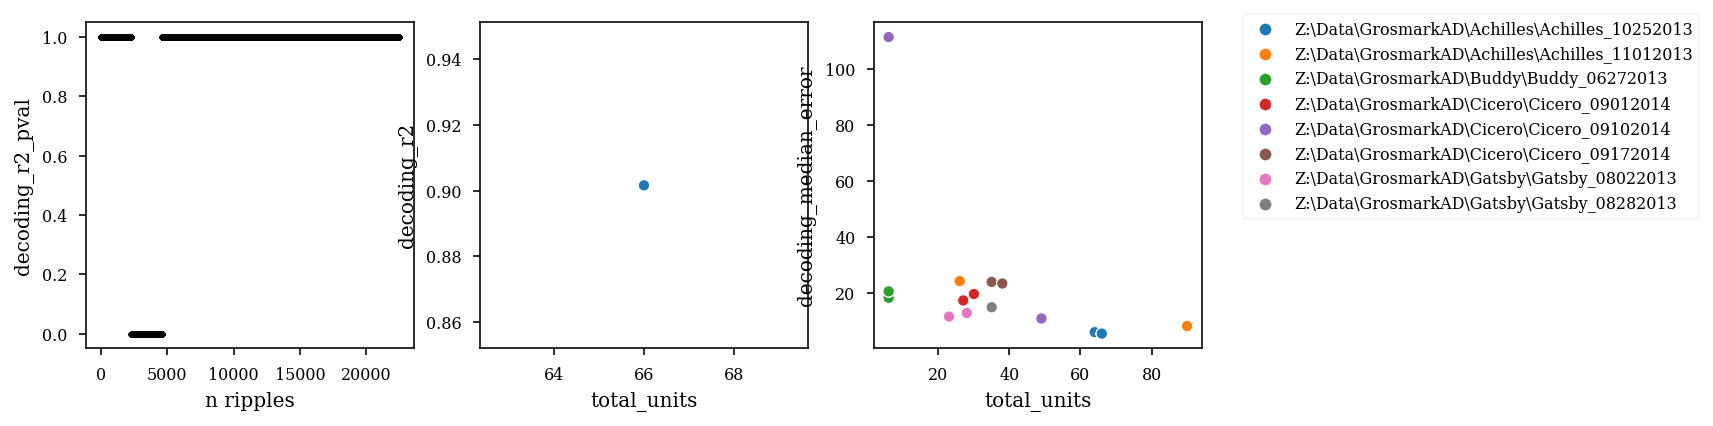

In [5]:
fig,axs = plt.subplots(1,3,figsize=(10,3))
axs[0].plot(df.decoding_r2_pval,'.k')
axs[0].set_ylabel('decoding_r2_pval')
axs[0].set_xlabel('n ripples')

sns.scatterplot(x="total_units", y="decoding_r2",
                hue="basepath",
                data=df, ax=axs[1],legend=False)

sns.scatterplot(x="total_units", y="decoding_median_error",
                hue="basepath",
                data=df, ax=axs[2])
axs[2].legend(bbox_to_anchor=(1.1, 1.05))


In [15]:
alpha = 0.05
print('n ripples',df.shape[0])
print('pass by col swap',sum(df['score_pval_col_cycle'] < alpha))

print(df[df['score_pval_col_cycle'] < alpha].basepath.value_counts())
print('')
print('pass by time swap',sum(df['score_pval_time_swap'] < alpha))
print(df[df['score_pval_time_swap'] < alpha].basepath.value_counts())
print('')
print('pass by time swap & col swap',sum((df['score_pval_time_swap'] < alpha) & (df['score_pval_col_cycle'] < alpha)))
print(df[(df['score_pval_time_swap'] < alpha) & (df['score_pval_col_cycle'] < alpha)].basepath.value_counts())
# df[(df['score_pval_time_swap'] < alpha) & (df['score_pval_col_cycle'] < alpha)].basepath.value_counts().plot(kind='barh')

n ripples 22473
pass by col swap 2252
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013    464
Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    449
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014        410
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013        313
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014        269
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014        195
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013        148
Z:\Data\GrosmarkAD\Buddy\Buddy_06272013            4
Name: basepath, dtype: int64

pass by time swap 1165
Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    300
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013    239
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014        181
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014        179
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013        109
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014        100
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013         56
Z:\Data\GrosmarkAD\Buddy\Buddy_06272013            1
Name: basepath, dtype: int64

pass by time swap & col swap 63

## Show some replay and non replay examples

In [6]:
session = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay\Z__Data_GrosmarkAD_Achilles_Achilles_10252013.pkl'
basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'
with open(session, 'rb') as f:
    results = pickle.load(f)

temp_df = df[(df.basepath == basepath)]    
idx = np.where((temp_df['score_pval_col_cycle'] < 0.05))[0][0:30]
temp_df[temp_df['score_pval_col_cycle'] < 0.05]

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,traj_speed,traj_step,replay_type,pop_partic,decoding_r2,decoding_r2_pval,decoding_median_error,total_units,direction,epoch
11,514.3456,514.4504,514.4000,88.629947,0.1048,286.102145,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,1162.264151,23.245283,forward,0.265625,NaN,1.000000,5.945866,64.0,outbound_epochs,pre_sleep
12,523.7368,523.8336,523.7552,452.429683,0.0968,168.945194,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,1856.603774,37.132075,forward,0.234375,NaN,1.000000,5.945866,64.0,outbound_epochs,pre_sleep
20,793.5048,793.6072,793.5592,213.576980,0.1024,148.108714,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,1041.509434,20.830189,forward,0.265625,NaN,1.000000,5.945866,64.0,outbound_epochs,pre_sleep
34,1198.8072,1198.8928,1198.8456,409.672071,0.0856,160.891443,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,1011.320755,20.226415,reverse,0.156250,NaN,1.000000,5.945866,64.0,outbound_epochs,pre_sleep
38,1334.7928,1334.8736,1334.8536,326.301852,0.0808,142.486039,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,513.207547,10.264151,forward,0.265625,NaN,1.000000,5.945866,64.0,outbound_epochs,pre_sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,33819.4152,33819.5344,33819.5056,1029.082475,0.1192,164.582210,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,1086.792453,21.735849,forward,0.500000,0.901605,0.000666,5.433886,66.0,inbound_epochs,post_sleep
4558,34143.5448,34143.6568,34143.6184,772.696012,0.1120,160.872122,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,316.981132,6.339623,forward,0.257576,0.901605,0.000666,5.433886,66.0,inbound_epochs,post_sleep
4559,34143.5448,34143.6568,34143.6184,772.696012,0.1120,160.872122,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,316.981132,6.339623,forward,0.257576,0.901605,0.000666,5.433886,66.0,inbound_epochs,post_sleep
4577,34428.1976,34428.3112,34428.2496,423.913874,0.1136,131.641087,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,452.830189,9.056604,reverse,0.333333,0.901605,0.000666,5.433886,66.0,inbound_epochs,post_sleep


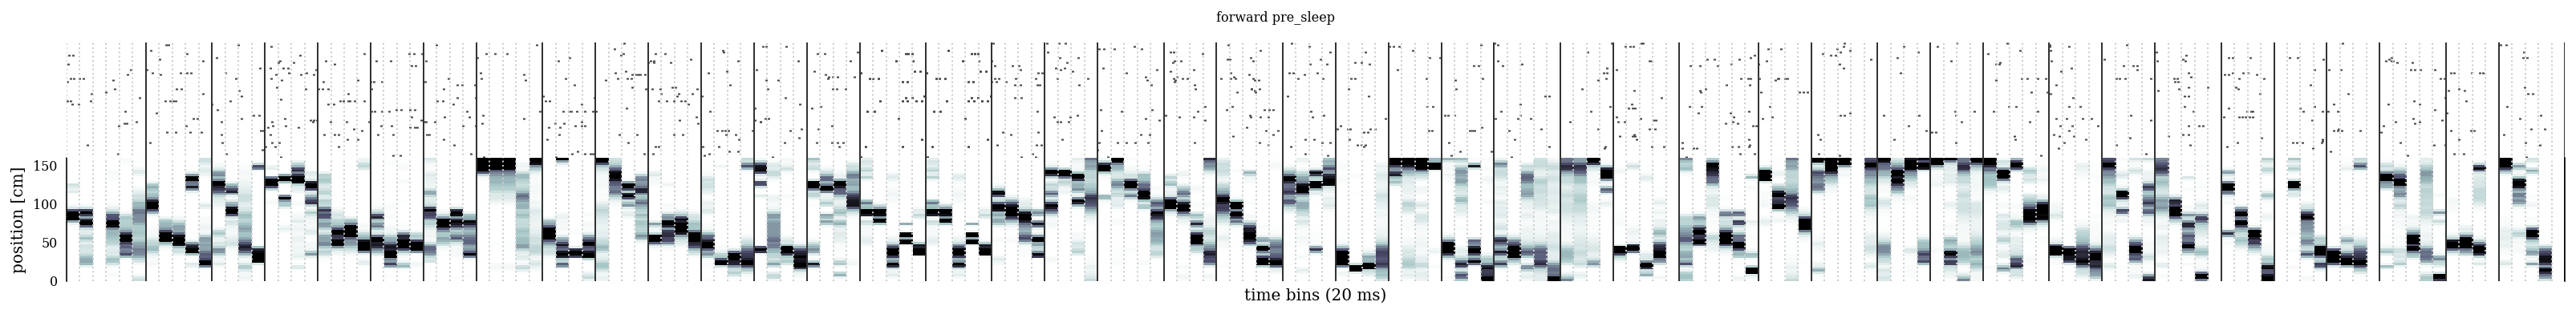

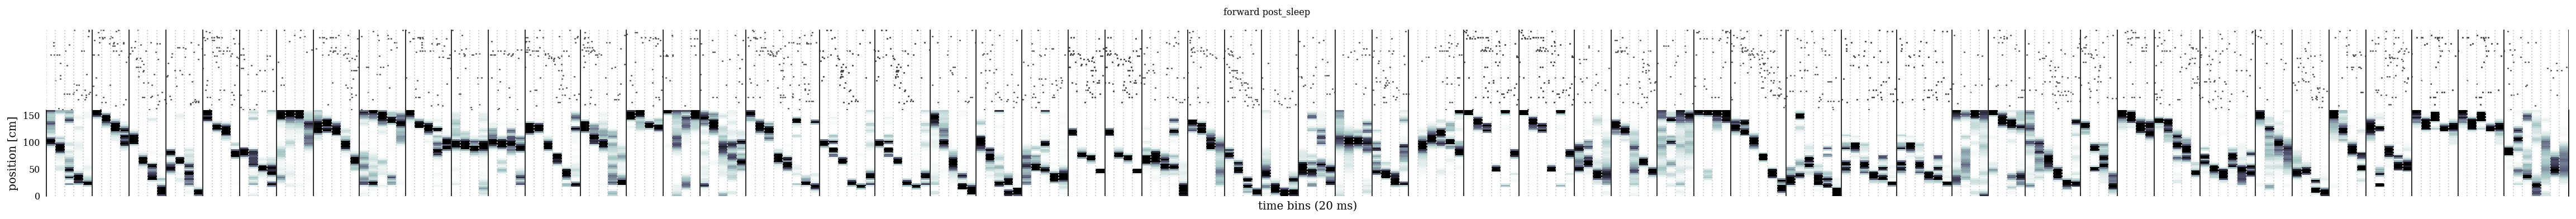

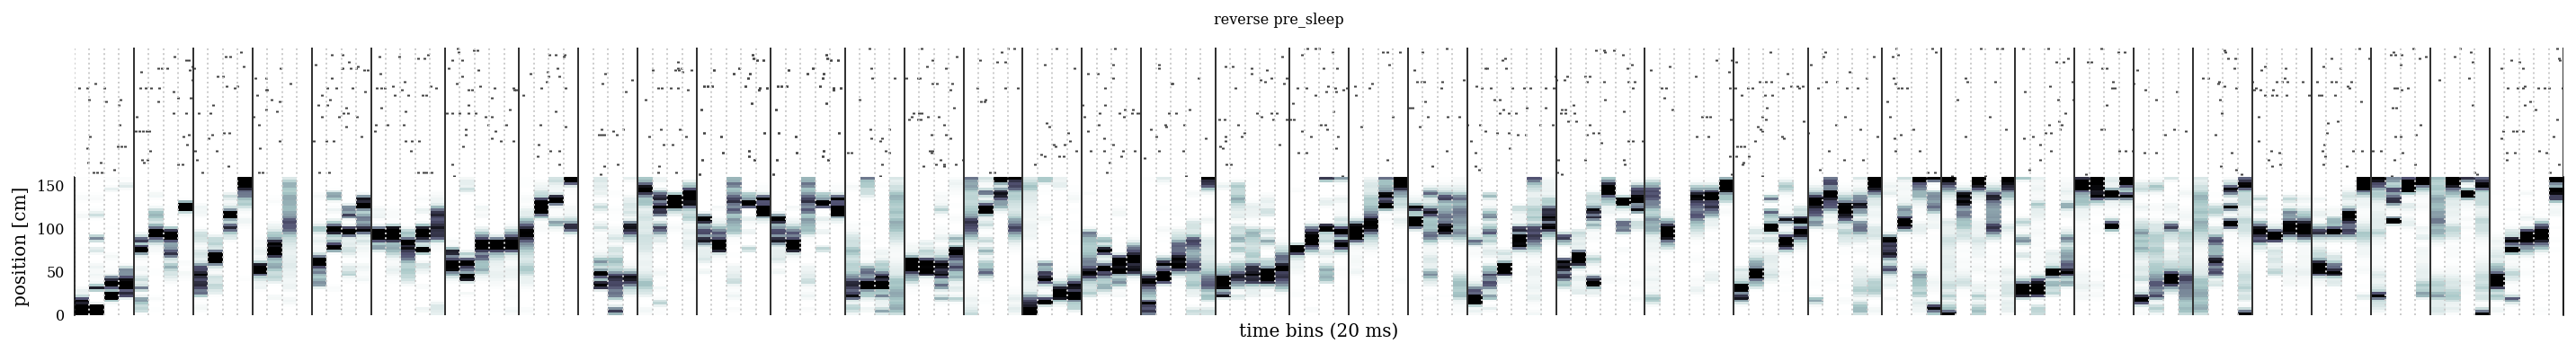

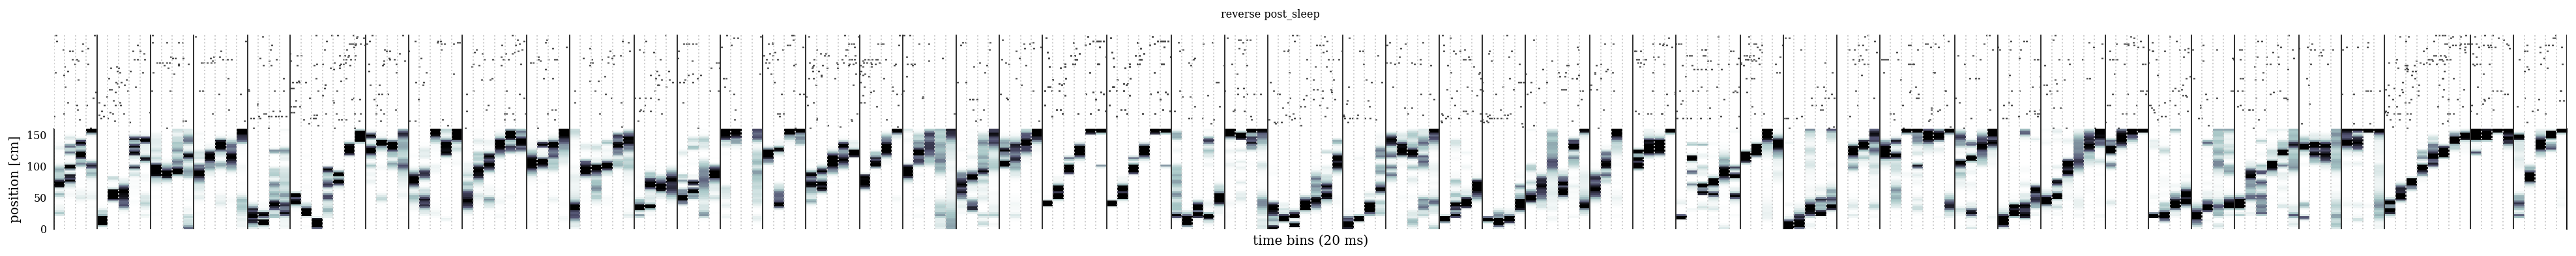

In [12]:
import warnings
warnings.filterwarnings("ignore")
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'

results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'
idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'forward') &
                (results['inbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward pre_sleep")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'forward') &
                (results['inbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward post_sleep")



idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'reverse') &
                (results['inbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse pre_sleep")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'reverse') &
                (results['inbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse post_sleep")


## get single session examples

In [14]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

sessions = glob.glob(save_path +os.sep+ '*.pkl')

with open(sessions[0], 'rb') as f:
    results = pickle.load(f)

basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'
temp_df = df[(df.basepath == basepath)]    
directions = temp_df.direction.unique()
n_sig = [sum((temp_df['score_pval_col_cycle'] < 0.05) & (temp_df['direction'] == directions[0])),
    sum((temp_df['score_pval_col_cycle'] < 0.05) & (temp_df['direction'] == directions[1]))]
direction = directions[np.argmax(n_sig)]
print(direction)

ripple_epochs = nel.EpochArray([np.array([results[direction]['df'].start,results[direction]['df'].stop]).T])
epoch_df = loading.load_epoch(results[direction]['df'].basepath.unique()[0])
behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])
st = results[direction]['sta_placecells']

# pre task ripple participation prob
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre_ripple = functions.get_participation(st.data,starts,stops)
unit_partic_pre_task = particip_mat_pre_ripple.mean(axis=1)

outbound_epochs


## Tuning curve snake plot

In [23]:
# results[direction]['sta_placecells']
# basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'
# epoch_df = epoch_df[(epoch_df.stopTime - epoch_df.startTime)/60 > 5]
# beh_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])
# pos,outbound_epochs,inbound_epochs = replay_run.handle_behavior(basepath,epoch_df,beh_epochs)


In [ ]:
direction

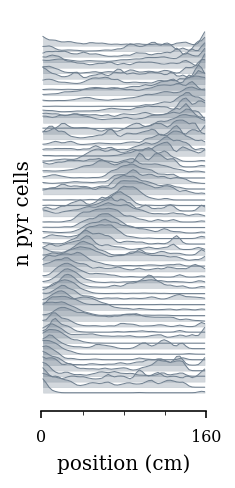

In [15]:
import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator

tc = results[direction]['tc'].reorder_units()

w,h = functions.set_size('thesis', fraction=.25, subplots=(4,1))

npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(w,h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(tc, normalize=True, pad=.4,fill=True,color='slategrey')
    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0,tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())

    plt.savefig(os.path.join(fig_save_path,'place_cell_snake_example.svg'),dpi=300,bbox_inches='tight')

In [25]:
basepath = results[direction]['session']
epoch_df = loading.load_epoch(basepath)
behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])

results[direction]['df'].loc[results[direction]['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results[direction]['df'].loc[results[direction]['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results[direction]['df'].loc[results[direction]['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'


## potentially get std of pre task rip participation for each sig replay event

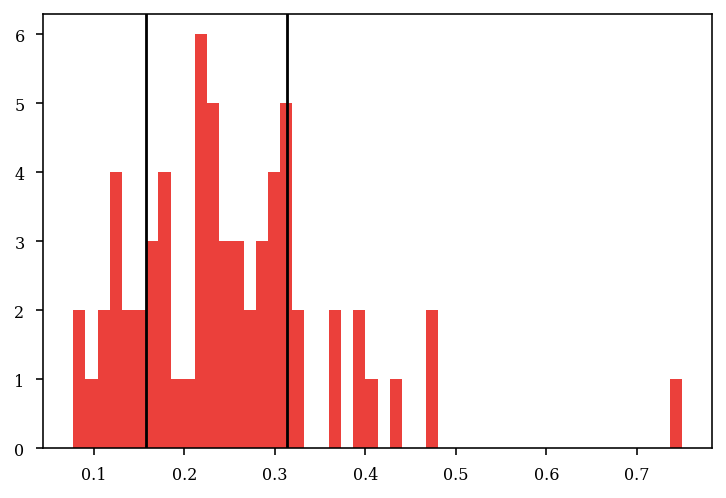

In [26]:
plt.hist(unit_partic_pre_task,50)
plt.axvline(np.percentile(unit_partic_pre_task,20),color='k')

plt.axvline(np.percentile(unit_partic_pre_task,80),color='k')
plt.show()

In [36]:
particip_mat = functions.get_participation(st.data,results[direction]['df'].start.values,results[direction]['df'].stop.values)

par_std = []
par_sem = []
n_active_check = []
par_median = []
par_mean = []
low_par_percent = []
for event in particip_mat.T:
    values = unit_partic_pre_task[event == 1]

    low_par_percent.append(sum(values < np.percentile(unit_partic_pre_task,20)) / len(values))

    par_std.append(np.std(values))
    par_sem.append(np.std(values)/np.sqrt(len(values)))
    n_active_check.append(len(values))
    par_median.append(np.median(values))
    par_mean.append(np.mean(values))

results['df']['par_std'] = np.hstack(par_std)
results['df']['par_sem'] = np.hstack(par_sem)
results['df']['n_active_check'] = np.hstack(n_active_check)
results['df']['par_median'] = np.hstack(par_median)
results['df']['par_mean'] = np.hstack(par_mean)
results['df']['low_par_percent'] = np.hstack(low_par_percent)


KeyError: 'df'

In [365]:
results['df'].keys()

Index(['start', 'stop', 'peaks', 'amplitude', 'duration', 'frequency',
       'detectorName', 'ripple_channel', 'event_spk_thres', 'basepath',
       'basename', 'animal', 'n_active', 'inactive_bin_prop',
       'trajectory_score', 'r_squared', 'slope', 'intercept',
       'score_pval_time_swap', 'score_pval_col_cycle', 'traj_dist',
       'traj_speed', 'traj_step', 'replay_type', 'dist_rat_start',
       'dist_rat_end', 'epoch', 'par_std', 'par_sem', 'n_active_check',
       'replay', 'par_median', 'par_mean', 'low_par_percent'],
      dtype='object')

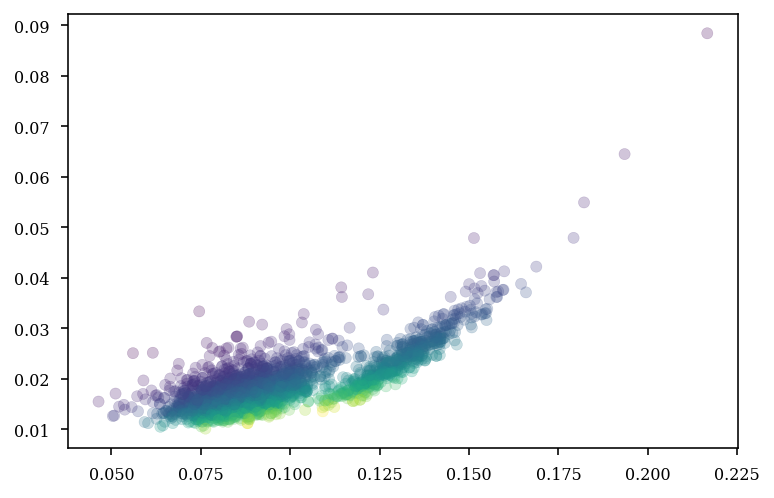

In [367]:
plt.scatter(results['df'].par_std,results['df'].par_sem,c=results['df'].n_active_check,alpha=.25)
# plt.yscale('log')
# plt.scatter(results['df'].n_active_check,results['df'].n_active,alpha=.25)


In [351]:
results['df']['replay'] = False

results['df'].loc[results['df']['score_pval_col_cycle'] < 0.05,'replay'] = True

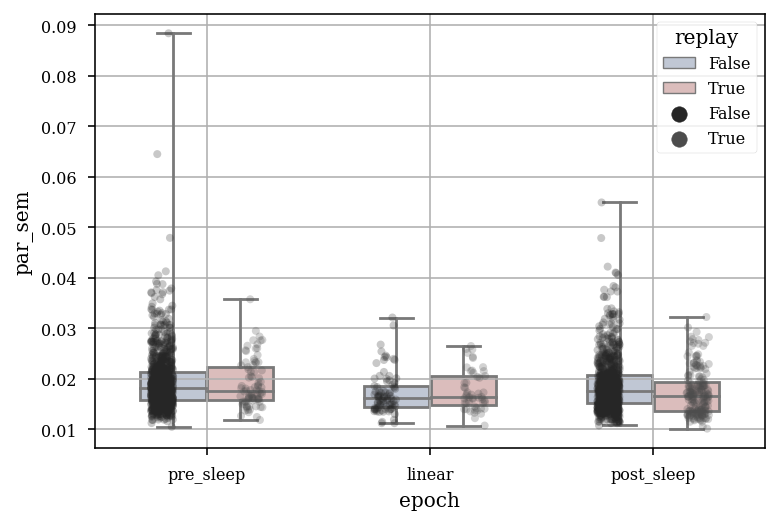

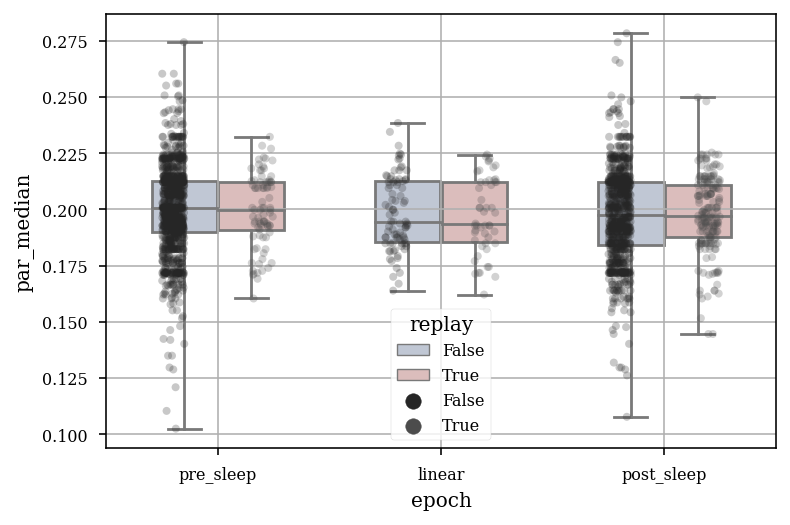

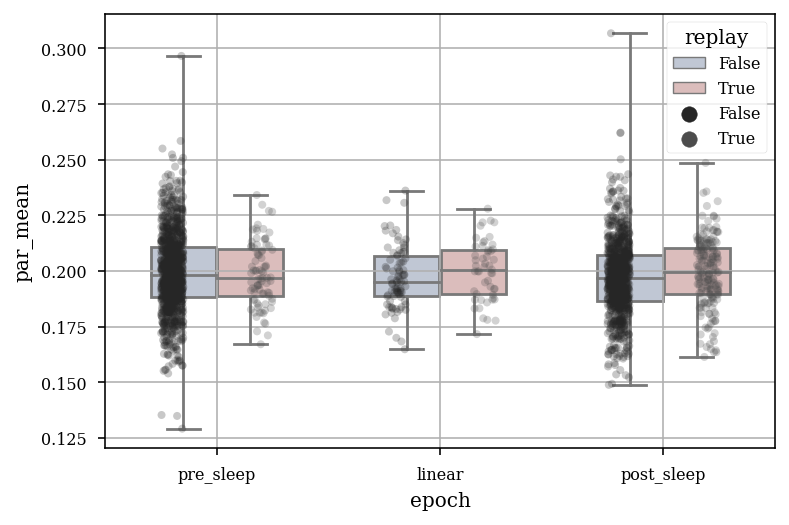

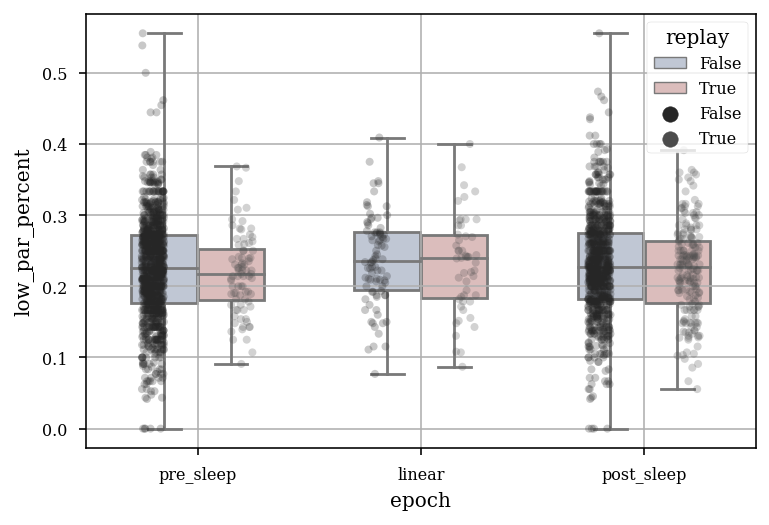

In [370]:
# plt.figure()

# sns.histplot(
#     results['df'],
#     x="par_std", hue="epoch",
#     edgecolor=".3",
#     linewidth=.5,common_bins=True,common_norm=False,kde=True,element="step",stat="density"
# )

# plt.figure()

# sns.histplot(
#     results['df'],
#     x="par_sem", hue="epoch",
#     edgecolor=".3",
#     linewidth=.5,common_bins=True,common_norm=False,kde=True,element="step",stat="density"
# )
alpha = 0.05
results['df']['replay'] = False
results['df'].loc[results['df']['score_pval_col_cycle'] < alpha,'replay'] = True

plt.figure()
sns.boxplot(x="epoch", y="par_sem",hue='replay', data=results['df'],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="epoch", y="par_sem",hue='replay', data=results['df'],
              size=4, color=".3", linewidth=0,dodge=True,alpha=.25)
# plt.yscale('log')
plt.grid()

plt.figure()
sns.boxplot(x="epoch", y="par_median",hue='replay', data=results['df'],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="epoch", y="par_median",hue='replay', data=results['df'],
              size=4, color=".3", linewidth=0,dodge=True,alpha=.25)
plt.grid()

plt.figure()
sns.boxplot(x="epoch", y="par_mean",hue='replay', data=results['df'],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="epoch", y="par_mean",hue='replay', data=results['df'],
              size=4, color=".3", linewidth=0,dodge=True,alpha=.25)
plt.grid()

plt.figure()
sns.boxplot(x="epoch", y="low_par_percent",hue='replay', data=results['df'],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="epoch", y="low_par_percent",hue='replay', data=results['df'],
              size=4, color=".3", linewidth=0,dodge=True,alpha=.25)
plt.grid()
# plt.figure()
# sns.histplot(
#     results['df'],
#     x="par_std", hue=results['df']['score_pval_col_cycle'] < 0.05,
#     edgecolor=".3",
#     linewidth=.5,common_bins=True,common_norm=False,kde=True,element="step",stat="density"
# )
# plt.axvline(0.105,color='k')

In [ ]:
vars = ["amplitude", "duration", "frequency",
        "n_active","inactive_bin_prop","trajectory_score",
        "r_squared","slope","score_pval_time_swap",
        "score_pval_col_cycle","traj_dist","traj_speed","traj_step","par_std"]

ax = sns.pairplot(results['df'],hue='epoch',corner=True,
        x_vars=vars,y_vars=vars)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:1590: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


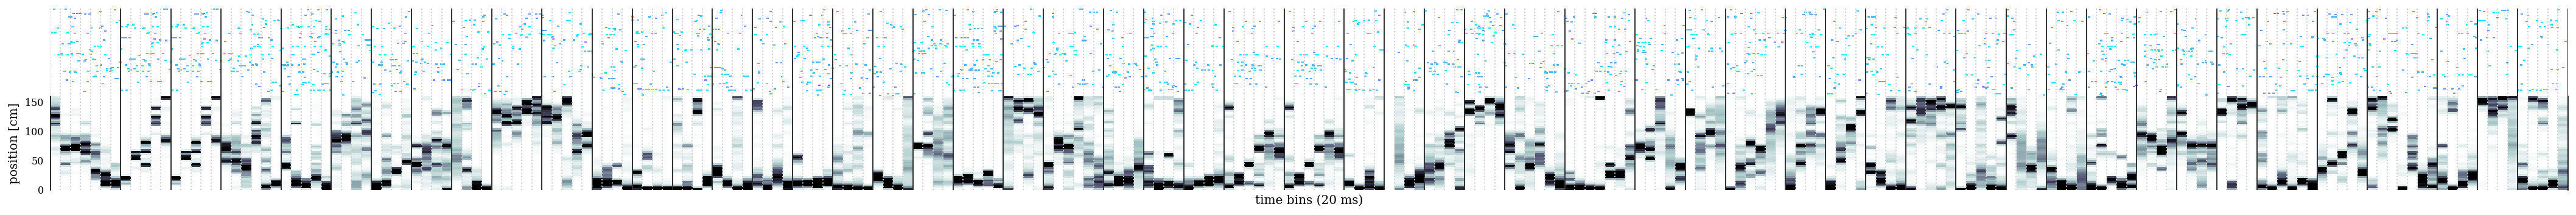

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:1590: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


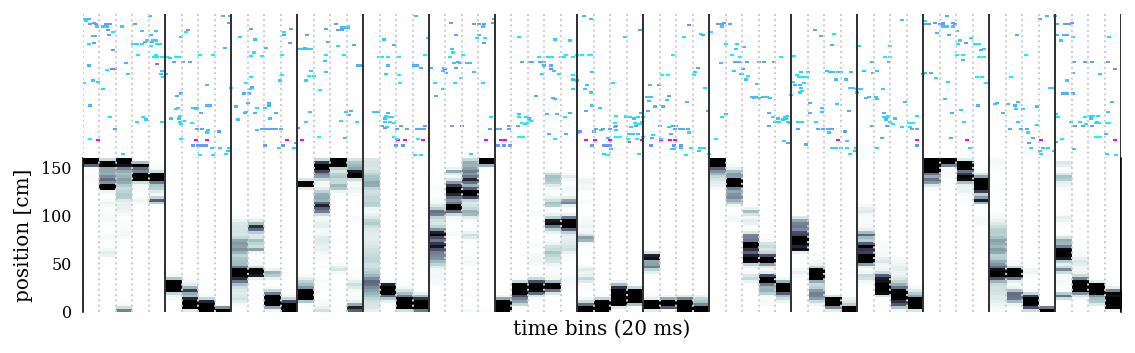

In [319]:
alpha = 0.05

idx = np.where(
    (results['df']['score_pval_col_cycle'] < alpha) &
    (results['df']['epoch'] == 'pre_sleep') & 
    (results['df']['par_sem'] < 0.02)
    )[0]

ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=unit_partic_pre_task,
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)
# color_scale_vector=np.log10(unit_partic_pre_task),

idx = np.where(
    (results['df']['score_pval_col_cycle'] < alpha) &
    (results['df']['epoch'] == 'linear') & 
    (results['df']['par_sem'] > 0.02)
    )[0]

ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=unit_partic_pre_task,
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


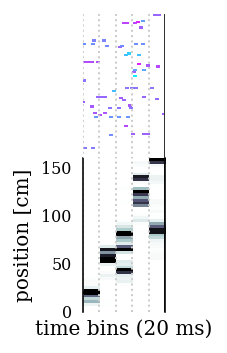

In [234]:
importlib.reload(replay_fig)

# idx = np.where(results['df']['score_pval_col_cycle'] < 0.01)[0][-20:]

idx = np.where(
    (results['df']['score_pval_col_cycle'] < 0.01) &
    (results['df']['epoch'] == 'pre_sleep')
    )[0][1]

ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][int(idx)],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=np.log10(unit_partic_pre_task),
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)

fig.savefig(os.path.join(fig_save_path,'pre_task_replay_example.svg'),dpi=300,bbox_inches='tight')


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


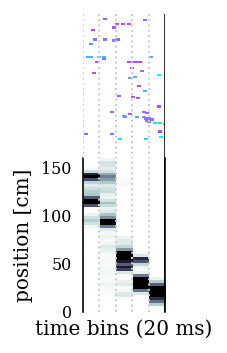

In [235]:
idx = np.where(
    (results['df']['score_pval_col_cycle'] < 0.01) &
    (results['df']['epoch'] == 'linear')
    )[0][13]

ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][int(idx)],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=np.log10(unit_partic_pre_task),
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)
fig.savefig(os.path.join(fig_save_path,'task_replay_example.svg'),dpi=300,bbox_inches='tight')


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


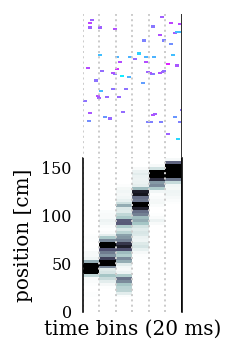

In [236]:
idx = np.where(
    (results['df']['score_pval_col_cycle'] < 0.01) &
    (results['df']['epoch'] == 'post_sleep')
    )[0][12]

idx = int(idx)
ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=np.log10(unit_partic_pre_task),
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)
fig.savefig(os.path.join(fig_save_path,'post_task_replay_example.svg'),dpi=300,bbox_inches='tight')

## Demonstrate that sig replay events benifit from recruiting units with low ripple participation probability

In [16]:
def shuffle_matrices(A,B,n_shuffles=1500):
    """
    shuffle_matrices: takes two matrices (A,B) with same n rows
        and randomly exchanges columns n_shuffles times
    """
    a_partic_shuff = np.zeros((A.shape[0],n_shuffles))
    b_partic_shuff = np.zeros_like(a_partic_shuff)

    for shuff_i in range(n_shuffles):
        # find number of columns to exchange based on the smallest matrix
        n_rearange = np.min([A.shape[1],B.shape[1]])
        # get n_rearange number of random columns to exchange scaled to each matrix
        idx_a = random.sample(range(0, A.shape[1]),n_rearange)
        idx_b = random.sample(range(0, B.shape[1]),n_rearange)
        # make copy of matrice to manipulate
        temp_a = A.copy()
        temp_b = B.copy()
        # use random column index to exchange columns between matrices
        temp_a[:,idx_a] = B[:,idx_b]
        temp_b[:,idx_b] = A[:,idx_a]
        # calculate participation prob. and save
        a_partic_shuff[:,shuff_i] = temp_a.mean(axis=1)
        b_partic_shuff[:,shuff_i] = temp_b.mean(axis=1)
    return a_partic_shuff,b_partic_shuff

def shuffle_matrices_v2(A,B,n_shuffles=1500):
    """
    shuffle_matrices: takes two matrices (A,B) with same n rows
        and randomly exchanges columns n_shuffles times
    """
    a_partic_shuff = np.zeros((A.shape[0],n_shuffles))
    b_partic_shuff = np.zeros_like(a_partic_shuff)

    X = np.concatenate([A,B],axis=1)

    for shuff_i in range(n_shuffles):

        idx_a = random.sample(range(0, X.shape[1]),A.shape[1])
        idx_b = random.sample(range(0, X.shape[1]),B.shape[1])

        a_partic_shuff[:,shuff_i] = X[:,idx_a].mean(axis=1)
        b_partic_shuff[:,shuff_i] = X[:,idx_b].mean(axis=1)

    return a_partic_shuff,b_partic_shuff

In [18]:
df

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,traj_speed,traj_step,replay_type,pop_partic,decoding_r2,decoding_r2_pval,decoding_median_error,total_units,direction,epoch
0,7.2344,7.3312,7.2776,692.400130,0.0968,162.842051,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,830.188679,16.603774,reverse,0.312500,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
1,26.9032,27.0112,26.9368,691.066738,0.1080,153.430269,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,905.660377,18.113208,forward,0.281250,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
2,47.6952,47.8432,47.7912,851.758590,0.1480,161.080797,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,1013.477089,20.269542,reverse,0.343750,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
3,55.2992,55.3992,55.3888,416.186103,0.1000,145.450890,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,905.660377,18.113208,forward,0.218750,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
4,203.6992,203.8064,203.7792,321.720041,0.1072,185.214900,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,226.415094,4.528302,forward,0.296875,NaN,1.0,5.945866,64.0,outbound_epochs,pre_sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22468,35207.4728,35207.5624,35207.4848,585.278805,0.0896,130.159669,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,1095.000000,21.900000,reverse,0.142857,NaN,1.0,14.839639,35.0,inbound_epochs,post_sleep
22469,35213.9024,35213.9840,35213.9488,531.870027,0.0816,124.002747,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,1815.000000,36.300000,forward,0.142857,NaN,1.0,14.839639,35.0,inbound_epochs,post_sleep
22470,35230.1416,35230.2432,35230.1624,408.787443,0.1016,158.530174,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,2640.000000,52.800000,reverse,0.314286,NaN,1.0,14.839639,35.0,inbound_epochs,post_sleep
22471,35262.5680,35262.6624,35262.5920,372.526411,0.0944,159.487343,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,3900.000000,78.000000,forward,0.200000,NaN,1.0,14.839639,35.0,inbound_epochs,post_sleep


In [19]:
df = df.sort_values(by=['basepath','start'])

for basepath in df.basepath.unique():
    save_file = os.path.join(save_path,basepath.replace(os.sep, "_").replace(":", "_")  + '.pkl')

    with open(save_file, 'rb') as f:
        results = pickle.load(f)

    temp_df = df[df.basepath == basepath]

    for direction in temp_df.direction.unique():
        st = results[direction]['sta_placecells']
        ripple_epochs = nel.EpochArray([np.array([results[direction]['df'].start,results[direction]['df'].stop]).T])
        epoch_df = loading.load_epoch(basepath)
        behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])
        
        sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle < alpha],
                                            results['df'].stop[results['df'].score_pval_col_cycle < alpha]]).T])

        non_sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle > alpha],
                                                    results['df'].stop[results['df'].score_pval_col_cycle > alpha]]).T])

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,traj_speed,traj_step,replay_type,pop_partic,decoding_r2,decoding_r2_pval,decoding_median_error,total_units,direction,epoch
0,7.2344,7.3312,7.2776,692.400130,0.0968,162.842051,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,830.188679,16.603774,reverse,0.312500,NaN,1.000000,5.945866,64.0,outbound_epochs,pre_sleep
2295,7.2344,7.3312,7.2776,692.400130,0.0968,162.842051,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,362.264151,7.245283,forward,0.227273,0.901605,0.000666,5.433886,66.0,inbound_epochs,pre_sleep
1,26.9032,27.0112,26.9368,691.066738,0.1080,153.430269,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,905.660377,18.113208,forward,0.281250,NaN,1.000000,5.945866,64.0,outbound_epochs,pre_sleep
2296,26.9032,27.0112,26.9368,691.066738,0.1080,153.430269,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,1071.698113,21.433962,reverse,0.257576,0.901605,0.000666,5.433886,66.0,inbound_epochs,pre_sleep
2,47.6952,47.8432,47.7912,851.758590,0.1480,161.080797,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,1013.477089,20.269542,reverse,0.343750,NaN,1.000000,5.945866,64.0,outbound_epochs,pre_sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22468,35207.4728,35207.5624,35207.4848,585.278805,0.0896,130.159669,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,1095.000000,21.900000,reverse,0.142857,NaN,1.000000,14.839639,35.0,inbound_epochs,post_sleep
22469,35213.9024,35213.9840,35213.9488,531.870027,0.0816,124.002747,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,1815.000000,36.300000,forward,0.142857,NaN,1.000000,14.839639,35.0,inbound_epochs,post_sleep
22470,35230.1416,35230.2432,35230.1624,408.787443,0.1016,158.530174,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,2640.000000,52.800000,reverse,0.314286,NaN,1.000000,14.839639,35.0,inbound_epochs,post_sleep
22471,35262.5680,35262.6624,35262.5920,372.526411,0.0944,159.487343,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,3900.000000,78.000000,forward,0.200000,NaN,1.000000,14.839639,35.0,inbound_epochs,post_sleep


0

In [54]:
alpha = 0.05
    
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

sessions = glob.glob(save_path +os.sep+ '*.pkl')
UID = []
unit_partic_post_sig_replay = []
unit_partic_pre_task = []
unit_partic_post_non_sig_replay = []
particip_mat_pre_ripple_shuff = []
particip_mat_post_replay_shuff = []
avg_fr_not_rip_pre_task = []
avg_fr_in_rip_pre_task = []
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

    basepath = results['outbound_epochs']['session']
    for direction in results.keys():

        ripple_epochs = nel.EpochArray([np.array([results[direction]['df'].start,results[direction]['df'].stop]).T])
        epoch_df = loading.load_epoch(basepath)
        behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])
        st = results[direction]['sta_placecells']

        sig_idx = results[direction]['df'].score_pval_col_cycle > alpha
        sig_replay_epochs = nel.EpochArray([np.array([results[direction]['df'].start[sig_idx],
                                                    results[direction]['df'].stop[sig_idx]]).T])
        non_sig_idx = results[direction]['df'].score_pval_col_cycle > alpha
        non_sig_replay_epochs = nel.EpochArray([np.array([results[direction]['df'].start[non_sig_idx],
                                                    results[direction]['df'].stop[non_sig_idx]]).T])
        # post task replay participation prob.
        starts = sig_replay_epochs[behavioral_epochs[2]].starts
        stops = sig_replay_epochs[behavioral_epochs[2]].stops
        if len(starts) == 0:
            unit_partic_post_sig_replay.append(np.tile(np.nan,st.data.shape[0]))
            particip_mat_post_replay = np.tile(np.nan,[st.data.shape[0],len(starts)])
        else:
            particip_mat_post_replay = functions.get_participation(st.data,starts,stops)
            unit_partic_post_sig_replay.append(particip_mat_post_replay.mean(axis=1))

        # post task non-replay participation prob.
        starts = non_sig_replay_epochs[behavioral_epochs[2]].starts
        stops = non_sig_replay_epochs[behavioral_epochs[2]].stops
        if len(starts) == 0:
            unit_partic_post_non_sig_replay.append(np.tile(np.nan,st.data.shape[0]))
        else:
            particip_mat = functions.get_participation(st.data,starts,stops)
            unit_partic_post_non_sig_replay.append(particip_mat.mean(axis=1))

        # pre task ripple participation prob
        starts = ripple_epochs[behavioral_epochs[0]].starts
        stops = ripple_epochs[behavioral_epochs[0]].stops
        if len(starts) == 0:
            unit_partic_pre_task.append(np.tile(np.nan,st.data.shape[0]))
            particip_mat_pre_ripple = np.tile(np.nan,[st.data.shape[0],len(starts)])
        else:
            particip_mat_pre_ripple = functions.get_participation(st.data,starts,stops)
            unit_partic_pre_task.append(particip_mat_pre_ripple.mean(axis=1))

        if len(ripple_epochs) == 0:
            avg_fr_not_rip_pre_task.append(np.tile(np.nan,st.data.shape[0]))
            avg_fr_in_rip_pre_task.append(np.tile(np.nan,st.data.shape[0]))
        else:
            avg_fr_not_rip_pre_task.append(st[behavioral_epochs[0]][~ripple_epochs].n_spikes / st[behavioral_epochs[0]][~ripple_epochs].support.duration)
            avg_fr_in_rip_pre_task.append(st[behavioral_epochs[0]][ripple_epochs].n_spikes / st[behavioral_epochs[0]][ripple_epochs].support.duration)

        # shuffle identity from pre to post
        # a_shuff,b_shuff = shuffle_matrices(particip_mat_pre_ripple,particip_mat_post_replay)
        a_shuff,b_shuff = shuffle_matrices_v2(particip_mat_pre_ripple,particip_mat_post_replay)
        particip_mat_pre_ripple_shuff.append(a_shuff)
        particip_mat_post_replay_shuff.append(b_shuff)

        UID.append(results[direction]['cell_metrics'].UID)

pre_post_df = pd.DataFrame()
pre_post_df['UID'] = np.hstack(UID)
pre_post_df['avg_fr_not_rip_pre_task'] = np.hstack(avg_fr_not_rip_pre_task)
pre_post_df['avg_fr_in_rip_pre_task'] = np.hstack(avg_fr_in_rip_pre_task)

pre_post_df['unit_partic_pre_task'] = np.hstack(unit_partic_pre_task)
pre_post_df['unit_partic_post_sig_replay'] = np.hstack(unit_partic_post_sig_replay)
pre_post_df['unit_partic_post_non_sig_replay'] = np.hstack(unit_partic_post_non_sig_replay)

particip_mat_pre_ripple_shuff = np.vstack(particip_mat_pre_ripple_shuff)
particip_mat_post_replay_shuff = np.vstack(particip_mat_post_replay_shuff)

In [55]:
y = (
    (pre_post_df.unit_partic_post_sig_replay-pre_post_df.unit_partic_pre_task) /
    (pre_post_df.unit_partic_post_sig_replay+pre_post_df.unit_partic_pre_task)
    )
y = y.values
y_shuff = (
            (particip_mat_post_replay_shuff-particip_mat_pre_ripple_shuff) /
            (particip_mat_post_replay_shuff+particip_mat_pre_ripple_shuff)
            )
sig_event_idx, pvalues = functions.get_significant_events(y,y_shuff)

pre_post_df['pre_post_ratio_pvalues'] = pvalues
pre_post_df

,UID,avg_fr_not_rip_pre_task,avg_fr_in_rip_pre_task,unit_partic_pre_task,unit_partic_post_sig_replay,unit_partic_post_non_sig_replay,pre_post_ratio_pvalues
0,3,1.215257,3.127299,0.256206,0.234205,0.234205,0.103264
1,7,1.442628,2.685798,0.207447,0.270153,0.270153,0.000666
2,11,0.414286,2.023547,0.148050,0.147059,0.147059,0.928048
3,12,1.364278,4.332230,0.328014,0.372549,0.372549,0.004664
4,16,0.880991,4.065489,0.294326,0.325708,0.325708,0.043304
...,...,...,...,...,...,...,...
528,42,0.305043,3.517756,0.220826,0.407080,0.407080,0.000666
529,43,1.206705,7.035511,0.473968,0.370575,0.370575,0.000666
530,44,0.402614,2.248462,0.192101,0.287611,0.287611,0.000666
531,45,0.675573,6.618458,0.448833,0.300885,0.300885,0.000666


In [58]:
pre_post_df = pre_post_df.dropna()

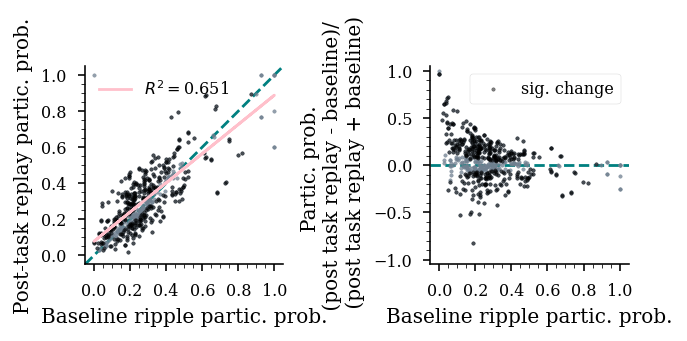

In [67]:
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1, subplots=(1,2)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.1)
axs = axs.ravel()

x,y = pre_post_df.unit_partic_pre_task,pre_post_df.unit_partic_post_sig_replay
reg = LinearRegression().fit(np.expand_dims(x,axis=1), y)
axs[0].scatter(x,y,s=3,alpha=.75,color='slategrey')
axs[0].scatter(x[pre_post_df.pre_post_ratio_pvalues<0.05], y[pre_post_df.pre_post_ratio_pvalues<0.05],s=3,alpha=.5,color='k')

axs[0].plot(x,x*reg.coef_+reg.intercept_,
            color='pink',
            label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))

y = (
    (pre_post_df.unit_partic_post_sig_replay-pre_post_df.unit_partic_pre_task) /
    (pre_post_df.unit_partic_post_sig_replay+pre_post_df.unit_partic_pre_task)
    )
y = y.values

x = pre_post_df.unit_partic_pre_task.values
axs[1].scatter(x, y,s=3,alpha=.75,color='slategrey')
axs[1].scatter(x[pre_post_df.pre_post_ratio_pvalues<0.05], y[pre_post_df.pre_post_ratio_pvalues<0.05],s=3,color='k',alpha=.5,label='sig. change')

axs[1].set_xlim(-.05,1.05)
axs[1].set_ylim(-1.05,1.05)

axs[1].axhline(0,color='teal',ls='--',zorder=-100)
axs[1].set_aspect(1./axs[1].get_data_ratio())
axs[1].set_xticks(np.arange(0,1.1,.2))

axs[0].set_xlim(-.05,1.05)
axs[0].set_ylim(-.05,1.05)
axs[0].set_aspect('equal')
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes,color='teal', ls='--',zorder=-100)
axs[0].set_xticks(np.arange(0,1.1,.2))
axs[0].set_yticks(np.arange(0,1.1,.2))

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
 
axs[0].set_xlabel('Baseline ripple partic. prob.')
axs[0].set_ylabel('Post-task replay partic. prob.')

axs[1].set_xlabel('Baseline ripple partic. prob.')
axs[1].set_ylabel('Partic. prob. \n (post task replay - baseline)/ \n (post task replay + baseline)')

axs[0].legend(frameon=False)
axs[1].legend(frameon=True)

plt.savefig(os.path.join(fig_save_path,'rip_particip_replay_particip_pre_post.svg'),dpi=300,bbox_inches='tight')


## look at baseline FR

No handles with labels found to put in legend.


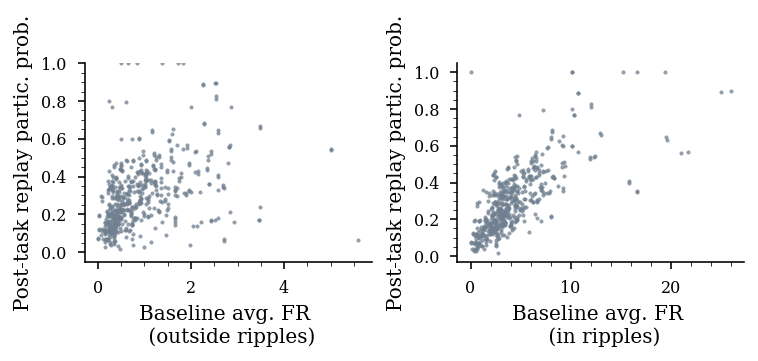

In [66]:
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1, subplots=(1,2)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.3)
axs = axs.ravel()

x,y = pre_post_df.avg_fr_not_rip_pre_task,pre_post_df.unit_partic_post_sig_replay
reg = LinearRegression().fit(np.expand_dims(x,axis=1), y)
axs[0].scatter(x,y,s=3,alpha=.75,color='slategrey')
# axs[0].plot(x,x*reg.coef_+reg.intercept_,
#             color='k',
#             label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))

axs[0].set_ylim(-.05,1)
axs[0].set_yticks(np.arange(0,1.1,.2))

x,y = pre_post_df.avg_fr_in_rip_pre_task,pre_post_df.unit_partic_post_sig_replay
reg = LinearRegression().fit(np.expand_dims(x,axis=1), y)
axs[1].scatter(x,y,s=3,alpha=.75,color='slategrey')
# axs[1].plot(x,x*reg.coef_+reg.intercept_,
#             color='k',
#             label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))

axs[0].set_ylim(-.05,1)
axs[0].set_yticks(np.arange(0,1.1,.2))

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
 
axs[0].set_xlabel('Baseline avg. FR \n (outside ripples)')
axs[0].set_ylabel('Post-task replay partic. prob.')

axs[1].set_xlabel('Baseline avg. FR \n (in ripples)')
axs[1].set_ylabel('Post-task replay partic. prob.')
# axs[0].set_xscale('log')
axs[0].legend(frameon=False)

plt.savefig(os.path.join(fig_save_path,'rip_particip_replay_particip_pre_post_FR.svg'),dpi=300,bbox_inches='tight')


No handles with labels found to put in legend.


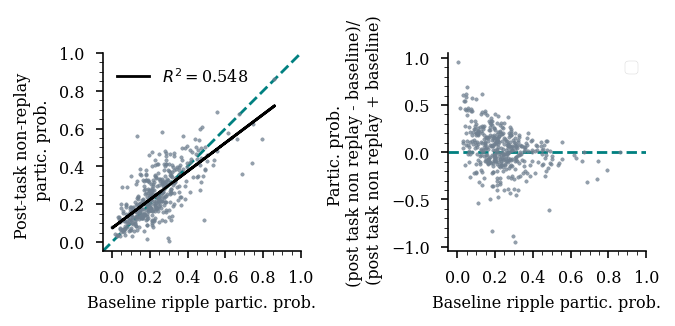

In [505]:
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1, subplots=(1,2)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.1)
axs = axs.ravel()

x,y = unit_partic_pre_task,unit_partic_post_non_sig_replay
reg = LinearRegression().fit(np.expand_dims(x,axis=1), y)
axs[0].scatter(x,y,s=3,alpha=.75,color='slategrey')
axs[0].plot(x,x*reg.coef_+reg.intercept_,
            color='k',
            label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))

y = (unit_partic_post_non_sig_replay-unit_partic_pre_task) / (unit_partic_post_non_sig_replay+unit_partic_pre_task)
# y_shuff = (
#             (particip_mat_post_replay_shuff-particip_mat_pre_ripple_shuff) /
#                 (particip_mat_post_replay_shuff+particip_mat_pre_ripple_shuff)
#             )
# sig_event_idx, pvalues = functions.get_significant_events(y,y_shuff.T)

x = unit_partic_pre_task
axs[1].scatter(x, y,s=3,alpha=.75,color='slategrey')
# axs[1].scatter(x[pvalues<0.05], y[pvalues<0.05],s=3,color='k',label='sig. change')

axs[1].set_xlim(-.05,1)
axs[1].set_ylim(-1.05,1.05)

axs[1].axhline(0,color='teal',ls='--',zorder=-100)
axs[1].set_aspect(1./axs[1].get_data_ratio())
axs[1].set_xticks(np.arange(0,1.1,.2))

axs[0].set_xlim(-.05,1)
axs[0].set_ylim(-.05,1)
axs[0].set_aspect('equal')
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes,color='teal', ls='--',zorder=-100)
axs[0].set_xticks(np.arange(0,1.1,.2))
axs[0].set_yticks(np.arange(0,1.1,.2))

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
 
axs[0].set_xlabel('Baseline ripple partic. prob.',fontsize=8)
axs[0].set_ylabel('Post-task non-replay \n partic. prob.',fontsize=8)

axs[1].set_xlabel('Baseline ripple partic. prob.',fontsize=8)
axs[1].set_ylabel('Partic. prob. \n (post task non replay - baseline)/ \n (post task non replay + baseline)',fontsize=8)

axs[0].legend(frameon=False)
axs[1].legend(frameon=True)

# plt.savefig(os.path.join(fig_save_path,'rip_particip_replay_particip_pre_post.svg'),dpi=300,bbox_inches='tight')


In [216]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle < 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle < 0.01]]).T])

non_sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle > 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle > 0.01]]).T])

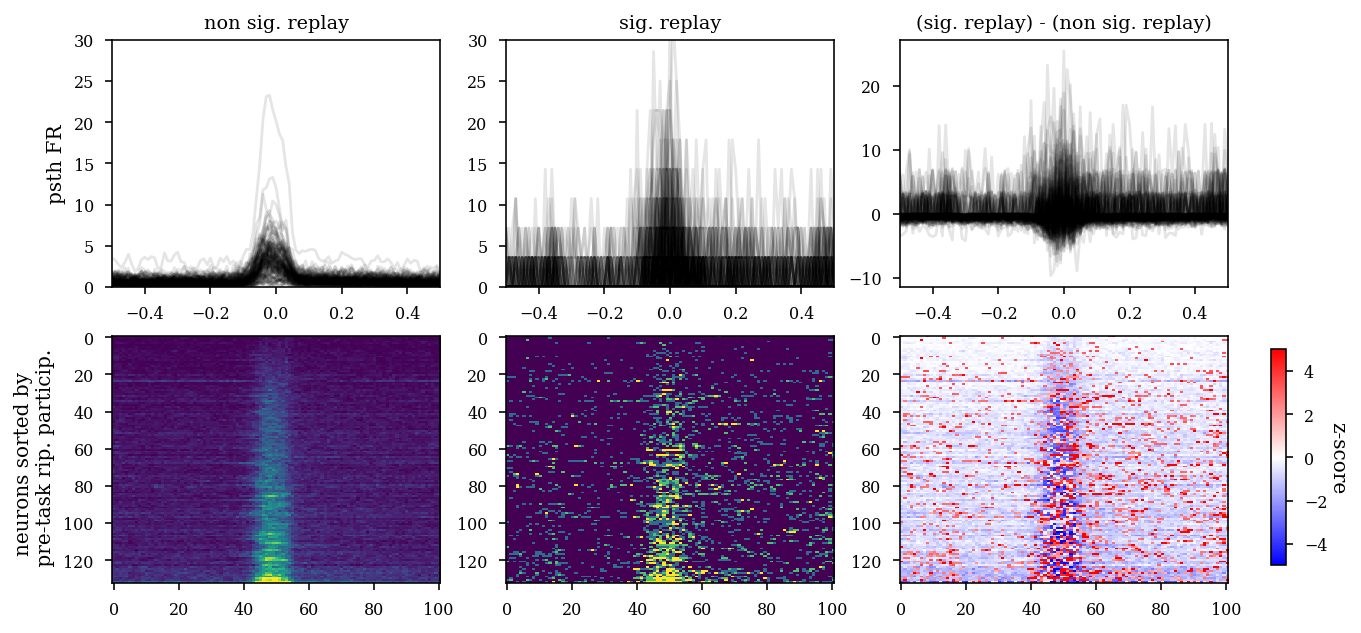

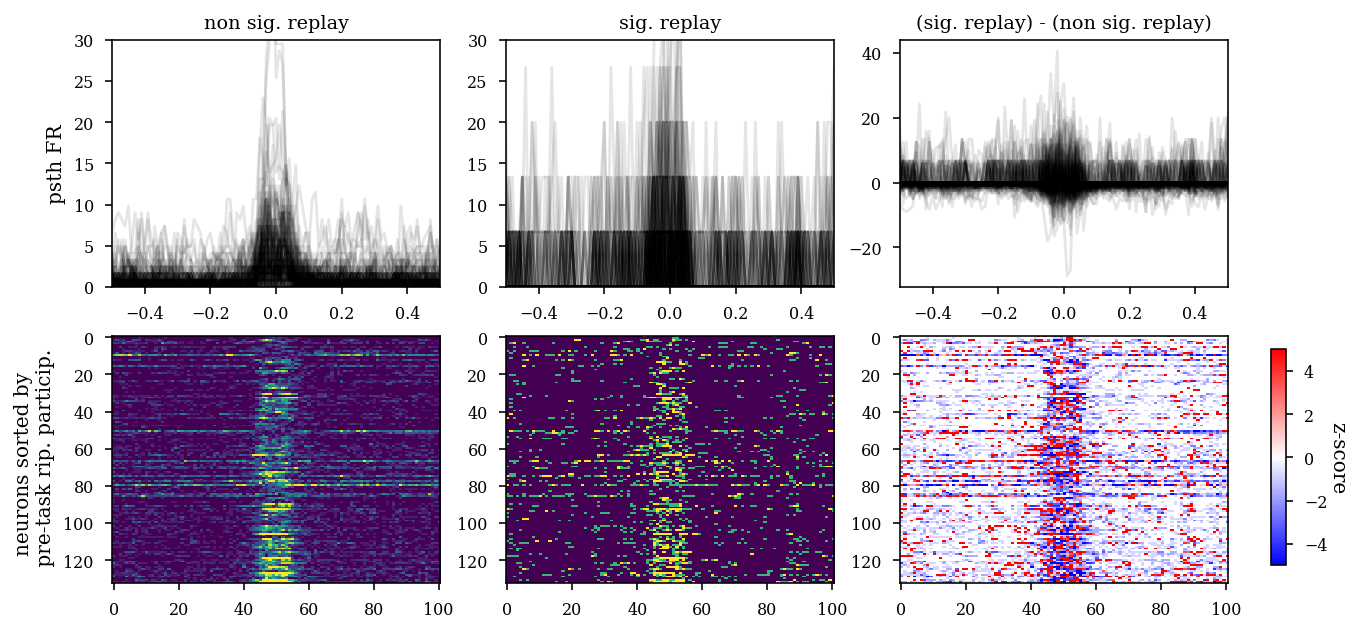

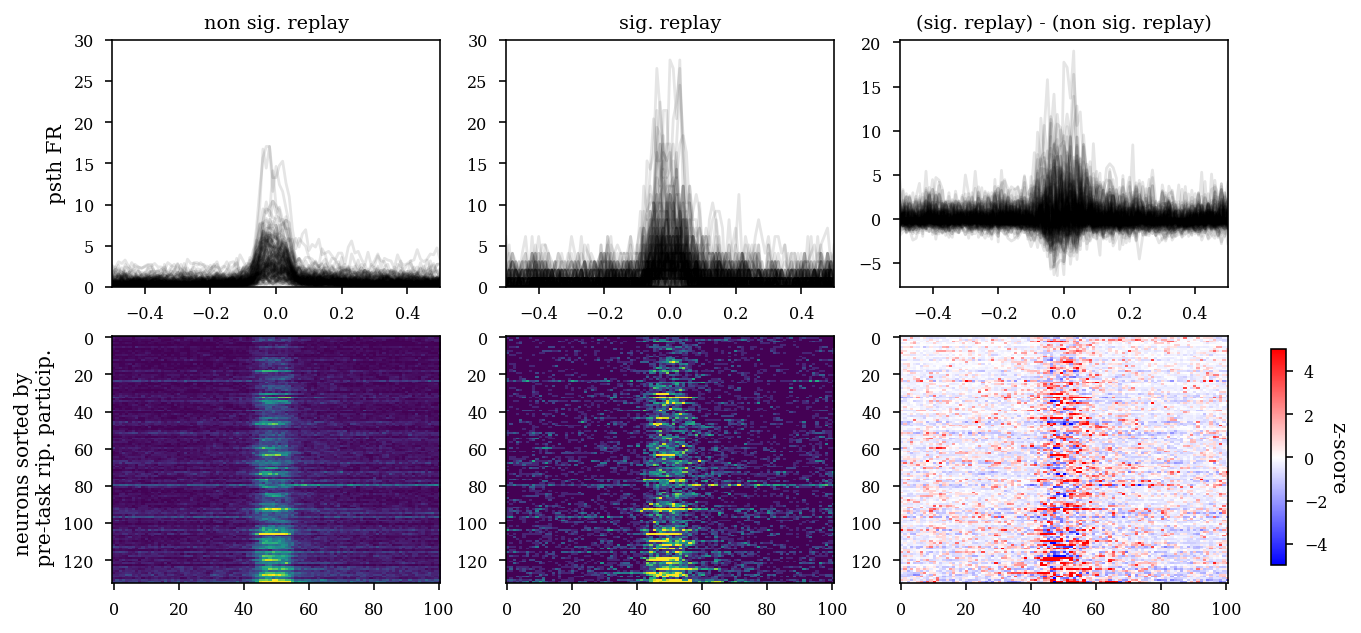

In [277]:
def plot_custom_psth(st,behavioral_epochs,unit_partic,epoch=2):
    fig,axs = plt.subplots(2,3,figsize=(10,5))

    psth_non_sig = functions.compute_psth(st[behavioral_epochs[epoch]].data,non_sig_replay_epochs[behavioral_epochs[epoch]].centers,bin_width=0.01,n_bins=100)
    axs[0,0].plot(psth_non_sig,color='k',alpha=.1)
    axs[1,0].imshow(psth_non_sig[np.argsort(unit_partic)].T,aspect='auto',interpolation='nearest',vmax=10)

    psth_sig = functions.compute_psth(st[behavioral_epochs[epoch]].data,sig_replay_epochs[behavioral_epochs[epoch]].centers,bin_width=0.01,n_bins=100)
    axs[0,1].plot(psth_sig,color='k',alpha=.1)
    axs[1,1].imshow(psth_sig[np.argsort(unit_partic)].T,aspect='auto',interpolation='nearest',vmax=10)

    axs[0,2].plot(psth_sig-psth_non_sig,color='k',alpha=.1)
    sm = axs[1,2].imshow((psth_sig-psth_non_sig)[np.argsort(unit_partic)].T,aspect='auto',interpolation='nearest',cmap='bwr',vmax=5,vmin=-5)

    axs[0,0].set_ylim(0,30)
    axs[0,1].set_ylim(0,30)

    axs[0,0].set_title('non sig. replay')
    axs[0,1].set_title('sig. replay')
    axs[0,2].set_title('(sig. replay) - (non sig. replay)')

    axs[0,0].set_ylabel('psth FR')

    axs[1,0].set_ylabel('neurons sorted by \n pre-task rip. particip.')

    axs[0,0].set_xlim(psth_non_sig.index.min(),psth_non_sig.index.max())
    axs[0,1].set_xlim(psth_non_sig.index.min(),psth_non_sig.index.max())
    axs[0,2].set_xlim(psth_non_sig.index.min(),psth_non_sig.index.max())


    cax = plt.axes([.93, 0.15, 0.01, 0.3])
    cbar = plt.colorbar(sm,cax=cax)
    cbar.set_label('z-score', rotation=270, labelpad=10)

plot_custom_psth(st,behavioral_epochs,unit_partic,epoch=0)    

plot_custom_psth(st,behavioral_epochs,unit_partic,epoch=1)    
plot_custom_psth(st,behavioral_epochs,unit_partic,epoch=2)    


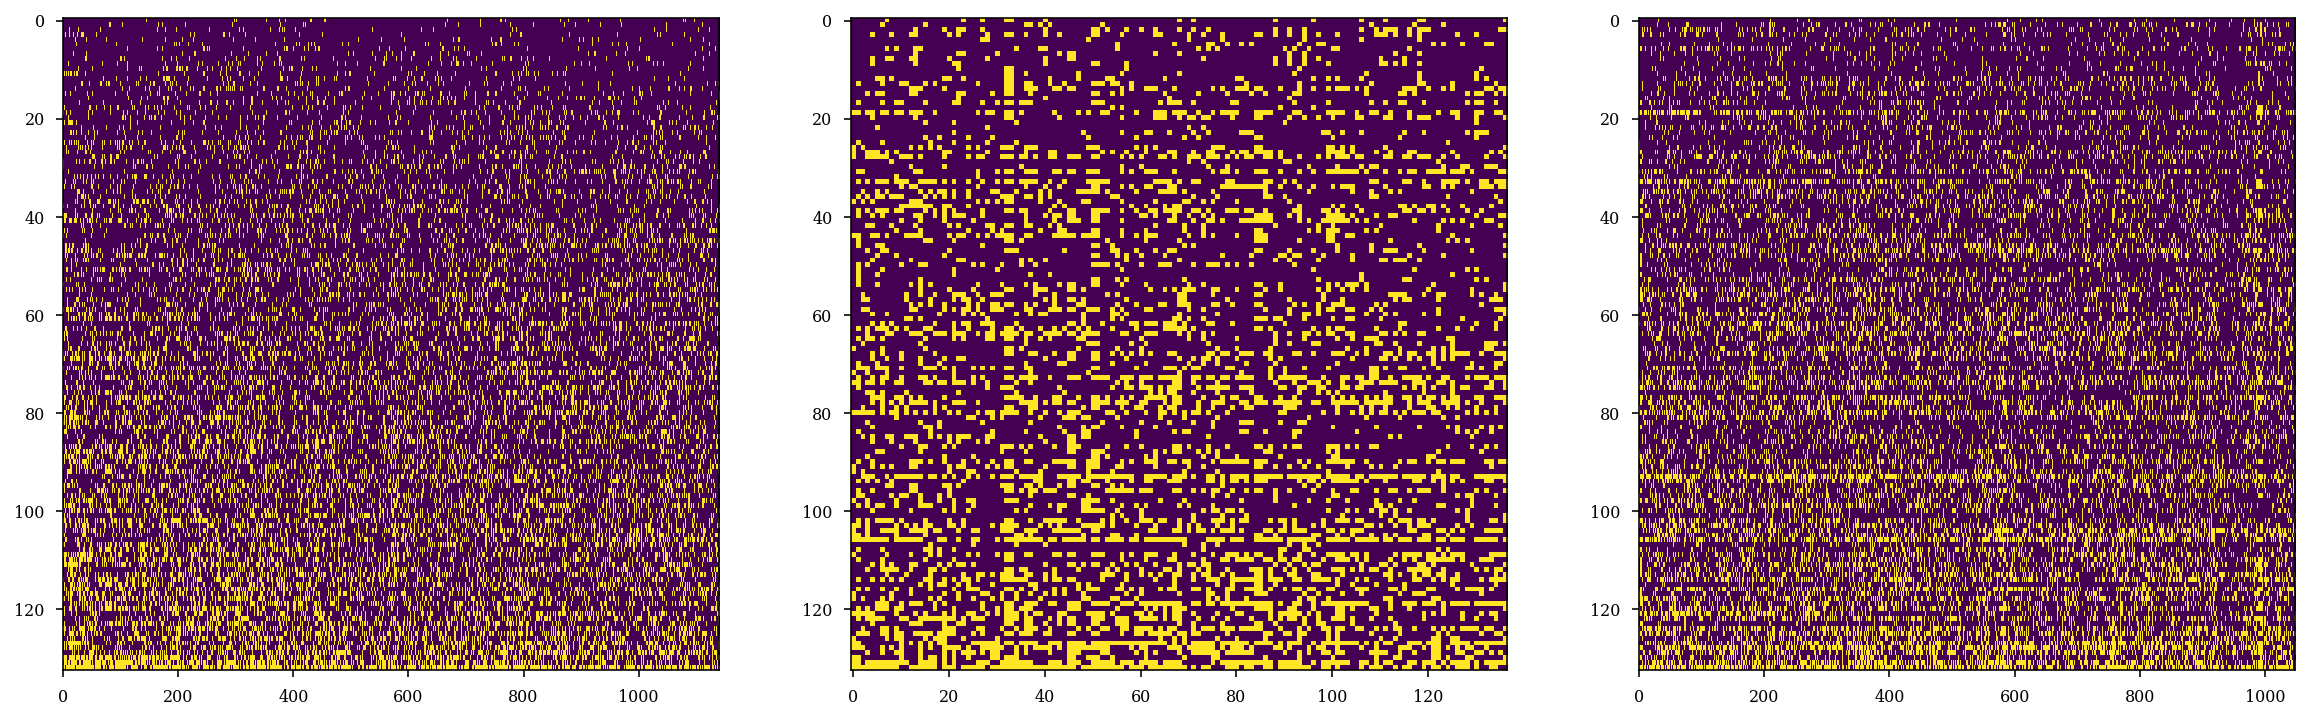

In [284]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

fig,axs = plt.subplots(1,3,figsize=(20,6))
idx = np.argsort(unit_partic)
axs[0].imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')


starts = ripple_epochs[behavioral_epochs[1]].starts
stops = ripple_epochs[behavioral_epochs[1]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

# idx = np.argsort(unit_partic)
axs[1].imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')


starts = ripple_epochs[behavioral_epochs[2]].starts
stops = ripple_epochs[behavioral_epochs[2]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

# idx = np.argsort(unit_partic)
axs[2].imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')

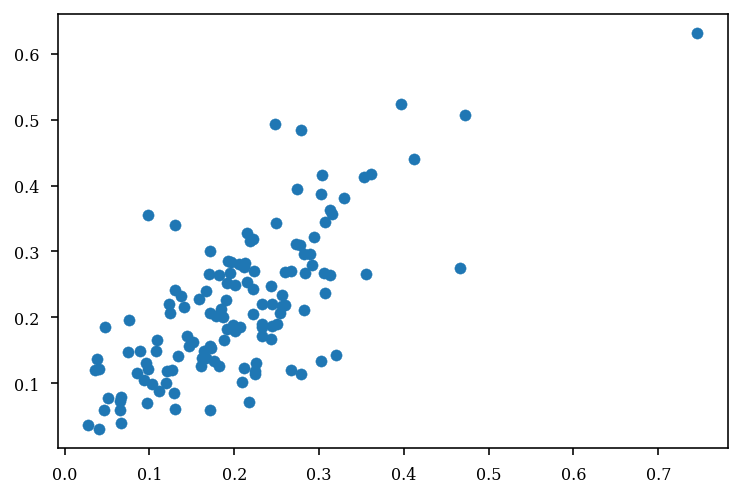

In [285]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre = functions.get_participation(st.data,starts,stops)
# pop_partic = particip_mat.mean(axis=0)
unit_partic_pre = particip_mat_pre.mean(axis=1)

starts = ripple_epochs[behavioral_epochs[2]].starts
stops = ripple_epochs[behavioral_epochs[2]].stops
particip_mat_post = functions.get_participation(st.data,starts,stops)
# pop_partic = particip_mat.mean(axis=0)
unit_partic_post = particip_mat_post.mean(axis=1)

plt.scatter(unit_partic_pre,unit_partic_post)

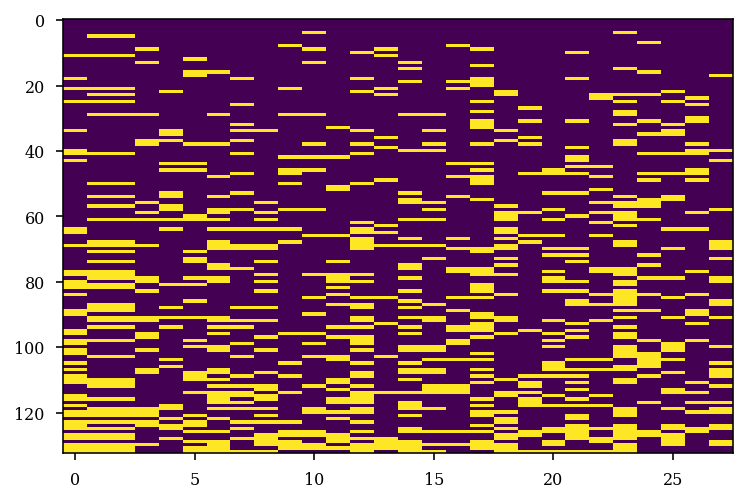

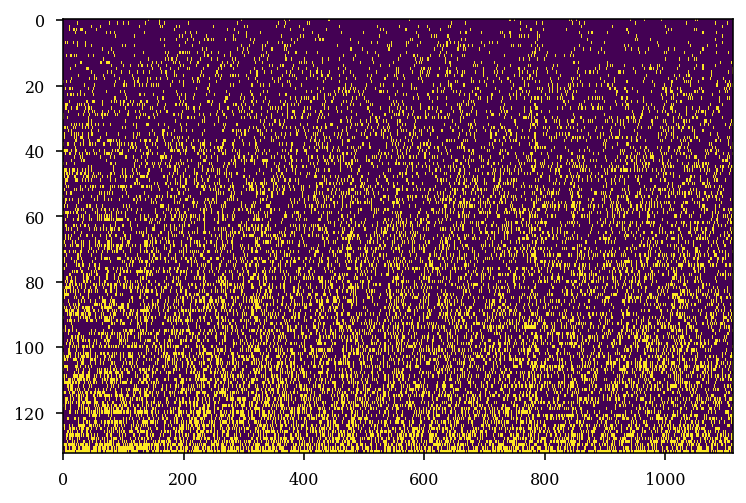

In [131]:
# plt.hist(unit_partic_pre,50)
# plt.show()

idx = results['df'].peaks.between(behavioral_epochs[0].start,behavioral_epochs[0].stop)

sort_idx = np.argsort(unit_partic_pre)

plt.imshow(particip_mat_pre[:,results['df'][idx].score_pval_col_cycle < 0.01][sort_idx],aspect='auto',interpolation='nearest')
plt.figure()
plt.imshow(particip_mat_pre[:,results['df'][idx].score_pval_col_cycle > 0.01][sort_idx],aspect='auto',interpolation='nearest')


In [132]:
sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle < 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle < 0.01]]).T])

non_sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle > 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle > 0.01]]).T])

starts = sig_replay_epochs[behavioral_epochs[0]].starts
stops = sig_replay_epochs[behavioral_epochs[0]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
unit_partic_pre_sig_replay = particip_mat.mean(axis=1)

starts = sig_replay_epochs[behavioral_epochs[1]].starts
stops = sig_replay_epochs[behavioral_epochs[1]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
unit_partic_task_sig_replay = particip_mat.mean(axis=1)

starts = sig_replay_epochs[behavioral_epochs[2]].starts
stops = sig_replay_epochs[behavioral_epochs[2]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
unit_partic_post_sig_replay = particip_mat.mean(axis=1)

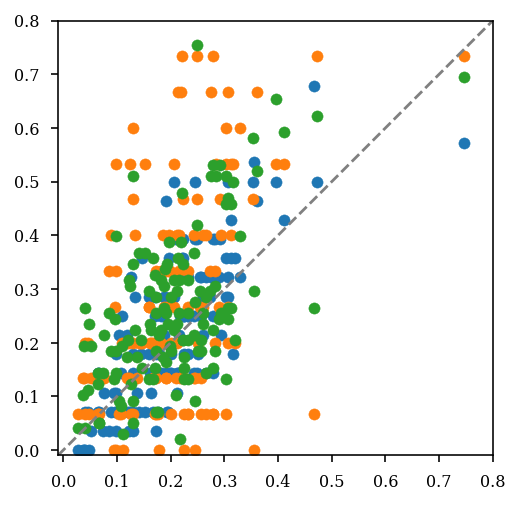

In [156]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre = functions.get_participation(st.data,starts,stops)
unit_partic_pre = particip_mat_pre.mean(axis=1)

plt.scatter(unit_partic_pre,unit_partic_pre_sig_replay)
plt.scatter(unit_partic_pre,unit_partic_task_sig_replay)
plt.scatter(unit_partic_pre,unit_partic_post_sig_replay)
plt.xlim(-.01,.8)
plt.ylim(-.01,.8)
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes,color='grey', ls='--')
ax.set_aspect('equal', adjustable='box')


In [167]:
# starts = sig_replay_epochs[behavioral_epochs[0]].starts
# stops = sig_replay_epochs[behavioral_epochs[0]].stops
# particip_mat = functions.get_participation(st.data,starts,stops)
# unit_partic_pre_sig_replay = particip_mat.mean(axis=1)

# # plt.imshow(unit_partic_pre[particip_mat])
# plt.imshow(unit_partic_pre[particip_mat],aspect='auto',interpolation='nearest')
# plt.colorbar()


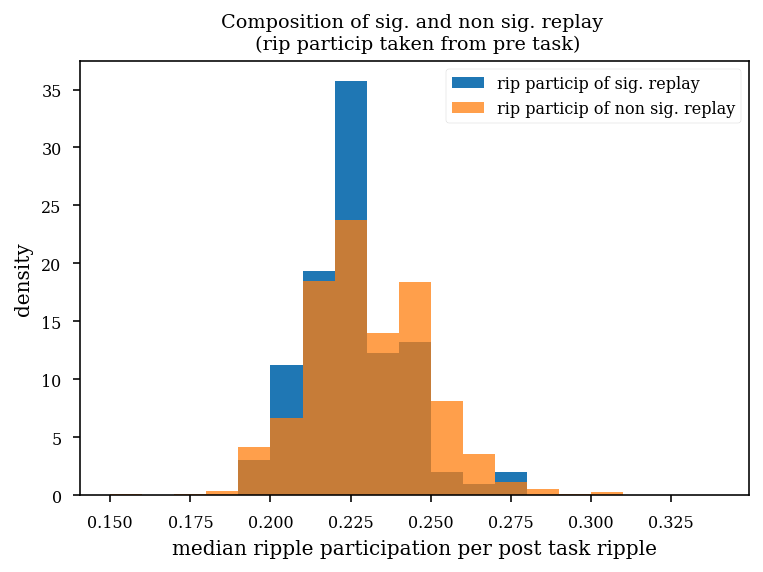

In [191]:
sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle < 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle < 0.01]]).T])

non_sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle > 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle > 0.01]]).T])
# get pre participation
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre = functions.get_participation(st.data,starts,stops)
unit_partic_pre = particip_mat_pre.mean(axis=1)

# get participation in sig. replay
starts = sig_replay_epochs[behavioral_epochs[2]].starts
stops = sig_replay_epochs[behavioral_epochs[2]].stops
particip_mat_sig_replay = functions.get_participation(st.data,starts,stops)

# get participation in non-sig. replay
starts = non_sig_replay_epochs[behavioral_epochs[2]].starts
stops = non_sig_replay_epochs[behavioral_epochs[2]].stops
particip_mat_non_sig_replay = functions.get_participation(st.data,starts,stops)

par_out = []
for event in particip_mat_sig_replay.T:
    par_out.append(np.median(unit_partic_pre[event == 1]))
par_out_sig_replay = np.hstack(par_out)

par_out = []
for event in particip_mat_non_sig_replay.T:
    par_out.append(np.median(unit_partic_pre[event == 1]))
par_out_non_sig_replay = np.hstack(par_out)

bins = np.arange(.15,.35,.01)
plt.hist(par_out_sig_replay,bins=bins,density=True,label='rip particip of sig. replay')
plt.hist(par_out_non_sig_replay,bins=bins,alpha=.75,density=True,label='rip particip of non sig. replay')
plt.xlabel('median ripple participation per post task ripple')
plt.ylabel('density')
plt.title('Composition of sig. and non sig. replay \n (rip particip taken from pre task)')
plt.legend()
plt.show()

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


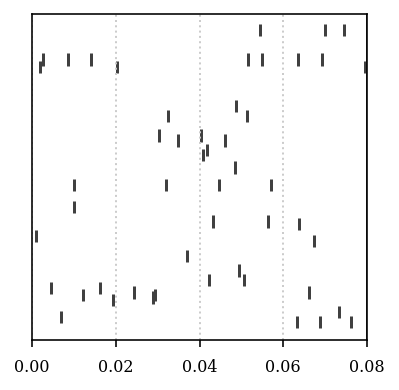

In [20]:

plt.figure(figsize=(3,3))

# plt.eventplot(results['sta_placecells'].data)
# plt.show()
bst = results['bst_placecells']
st = results['sta_placecells']
tc_placecells = results['tc']

idx = 0
bst = bst[idx]

no = tc_placecells.get_peak_firing_order_ids()
st.reorder_units_by_ids(no, inplace=True)

st_cut = st[bst.support]
st_cut._support = bst.support # hacky fix so that we can plot events out of order
st_cut = nel.utils.collapse_time(st_cut)

ax=plt.gca()
npl.rasterplot(st_cut, vertstack=True, ax=ax, lh=5)
ax.set_xlim(st_cut.support.time.squeeze())

bin_edges = np.linspace(st_cut.support.time[0,0],
                        st_cut.support.time[0,1],
                        bst.n_bins+1)

ax.vlines(bin_edges, *ax.get_ylim(), lw=1, linestyle=':', color='0.8')
ax.vlines(bin_edges[np.cumsum(bst.lengths)], *ax.get_ylim(), lw=1, color='0.2')

npl.utils.no_yticks(ax)
npl.utils.no_yticklabels(ax)

## Explore broad features of sig and non sig replay from different thresholds

<AxesSubplot:xlabel='pop_partic', ylabel='Probability'>

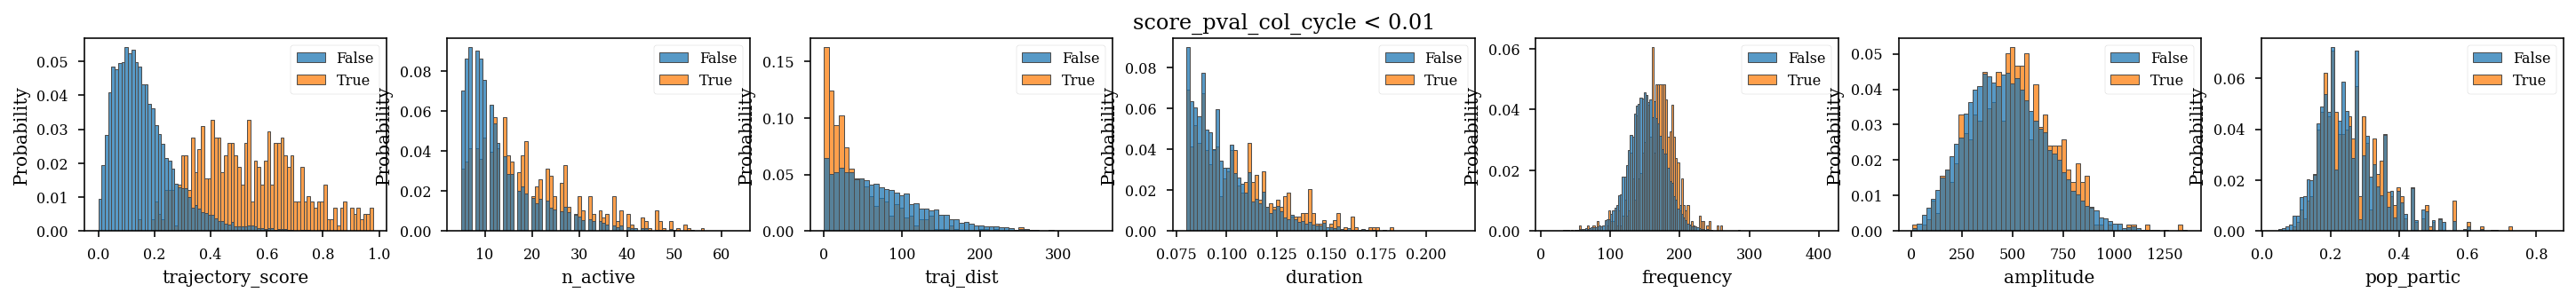

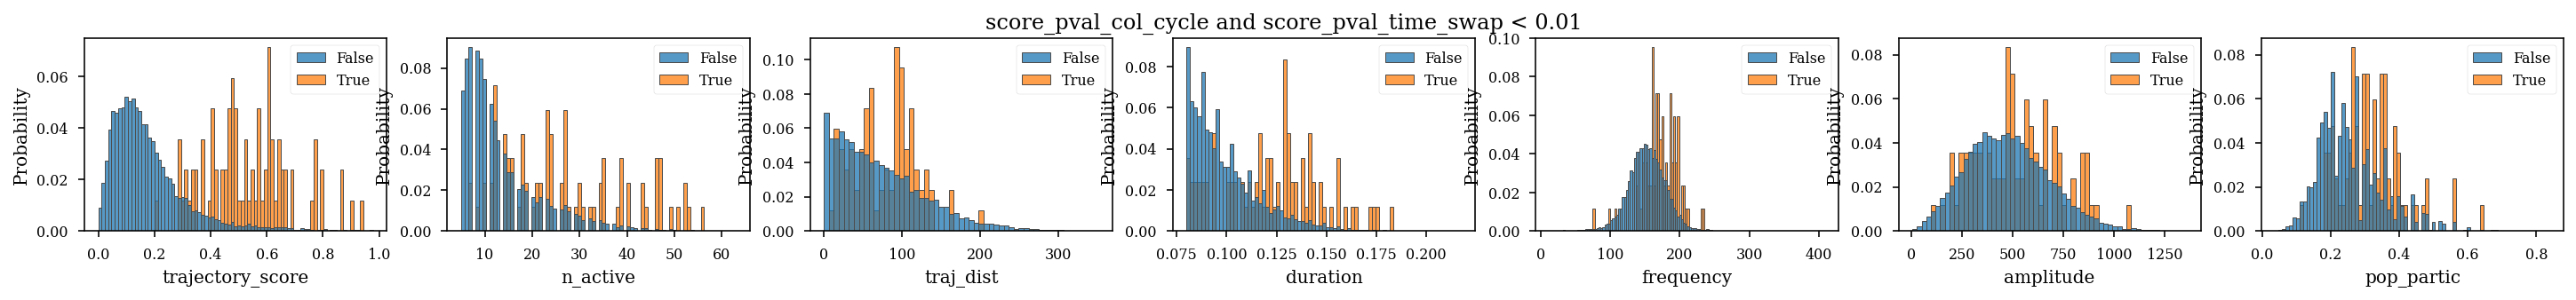

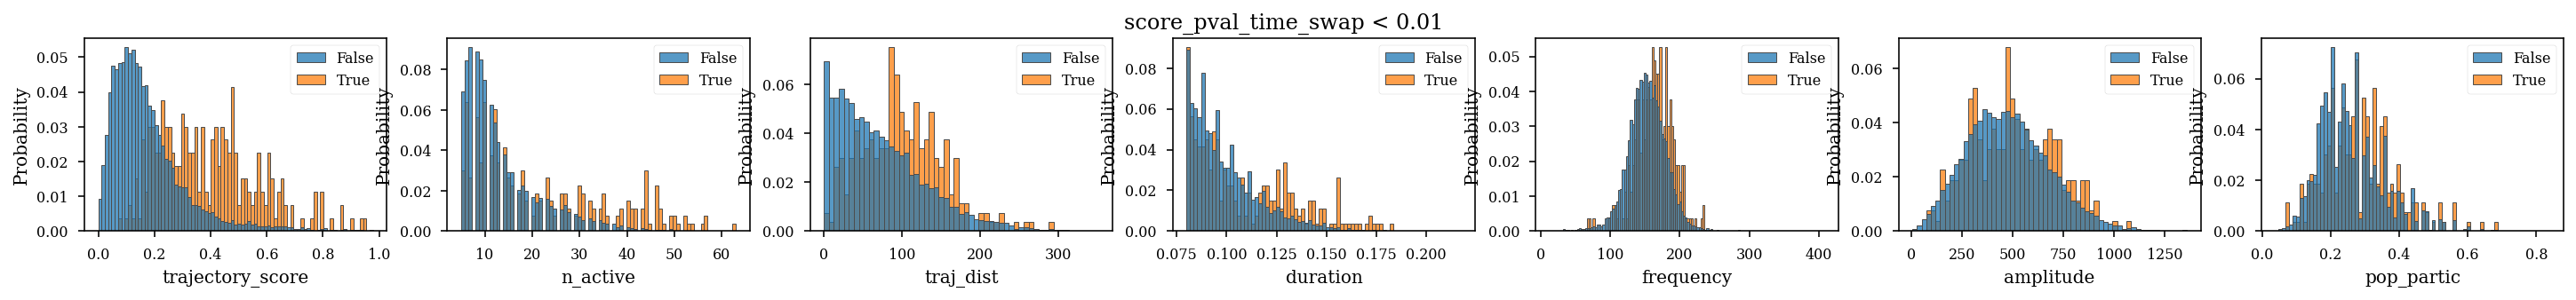

In [198]:
fig, axs = plt.subplots(1,7,figsize=(25,2))
fig.suptitle('score_pval_col_cycle < 0.01', fontsize=12)
idx = df['score_pval_col_cycle'].values < 0.01
sns.histplot(df,x="trajectory_score", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[0])
sns.histplot(df,x="n_active", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[1])
sns.histplot(df,x="traj_dist", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[2])
sns.histplot(df,x="duration", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[3])
sns.histplot(df,x="frequency", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[4])
sns.histplot(df,x="amplitude", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[5])
sns.histplot(df,x="pop_partic", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[6])

fig, axs = plt.subplots(1,7,figsize=(25,2))
fig.suptitle('score_pval_col_cycle and score_pval_time_swap < 0.01', fontsize=12)
idx = (df['score_pval_col_cycle'] < 0.01) & (df['score_pval_time_swap'] < 0.01)
sns.histplot(df,x="trajectory_score", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[0])
sns.histplot(df,x="n_active", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[1])
sns.histplot(df,x="traj_dist", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[2])
sns.histplot(df,x="duration", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[3])
sns.histplot(df,x="frequency", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[4])
sns.histplot(df,x="amplitude", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[5])
sns.histplot(df,x="pop_partic", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[6])

fig, axs = plt.subplots(1,7,figsize=(25,2))
fig.suptitle('score_pval_time_swap < 0.01', fontsize=12)
idx = (df['score_pval_time_swap'].values < 0.01)
sns.histplot(df,x="trajectory_score", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[0])
sns.histplot(df,x="n_active", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[1])
sns.histplot(df,x="traj_dist", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[2])
sns.histplot(df,x="duration", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[3])
sns.histplot(df,x="frequency", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[4])
sns.histplot(df,x="amplitude", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[5])
sns.histplot(df,x="pop_partic", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[6])

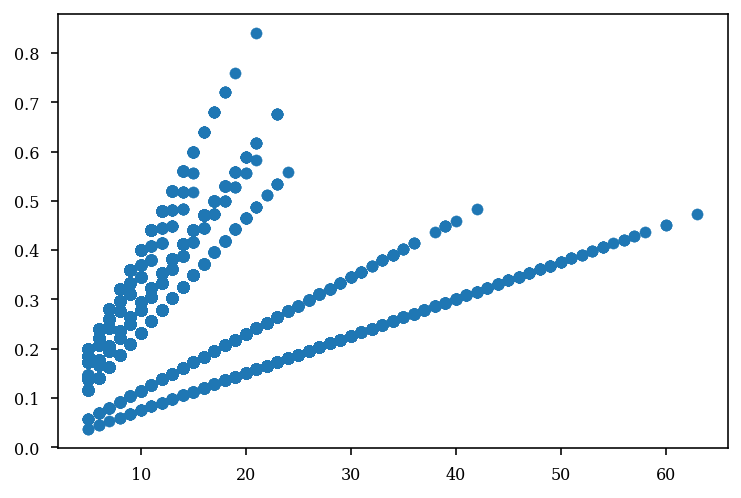

In [199]:
plt.scatter(df.n_active,df.pop_partic)

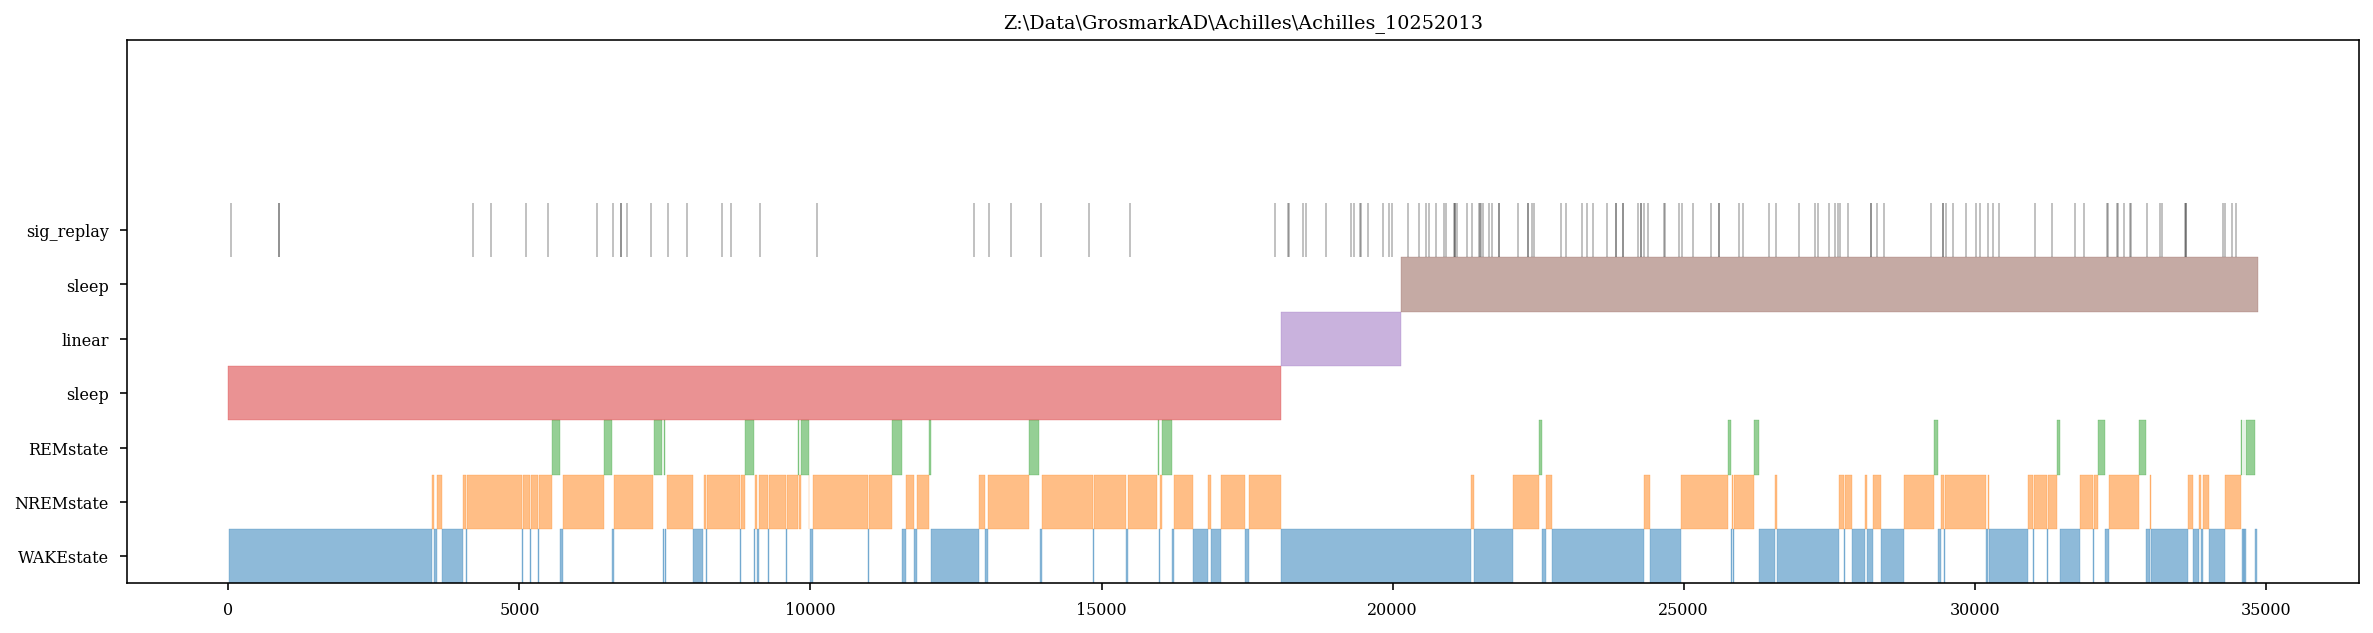

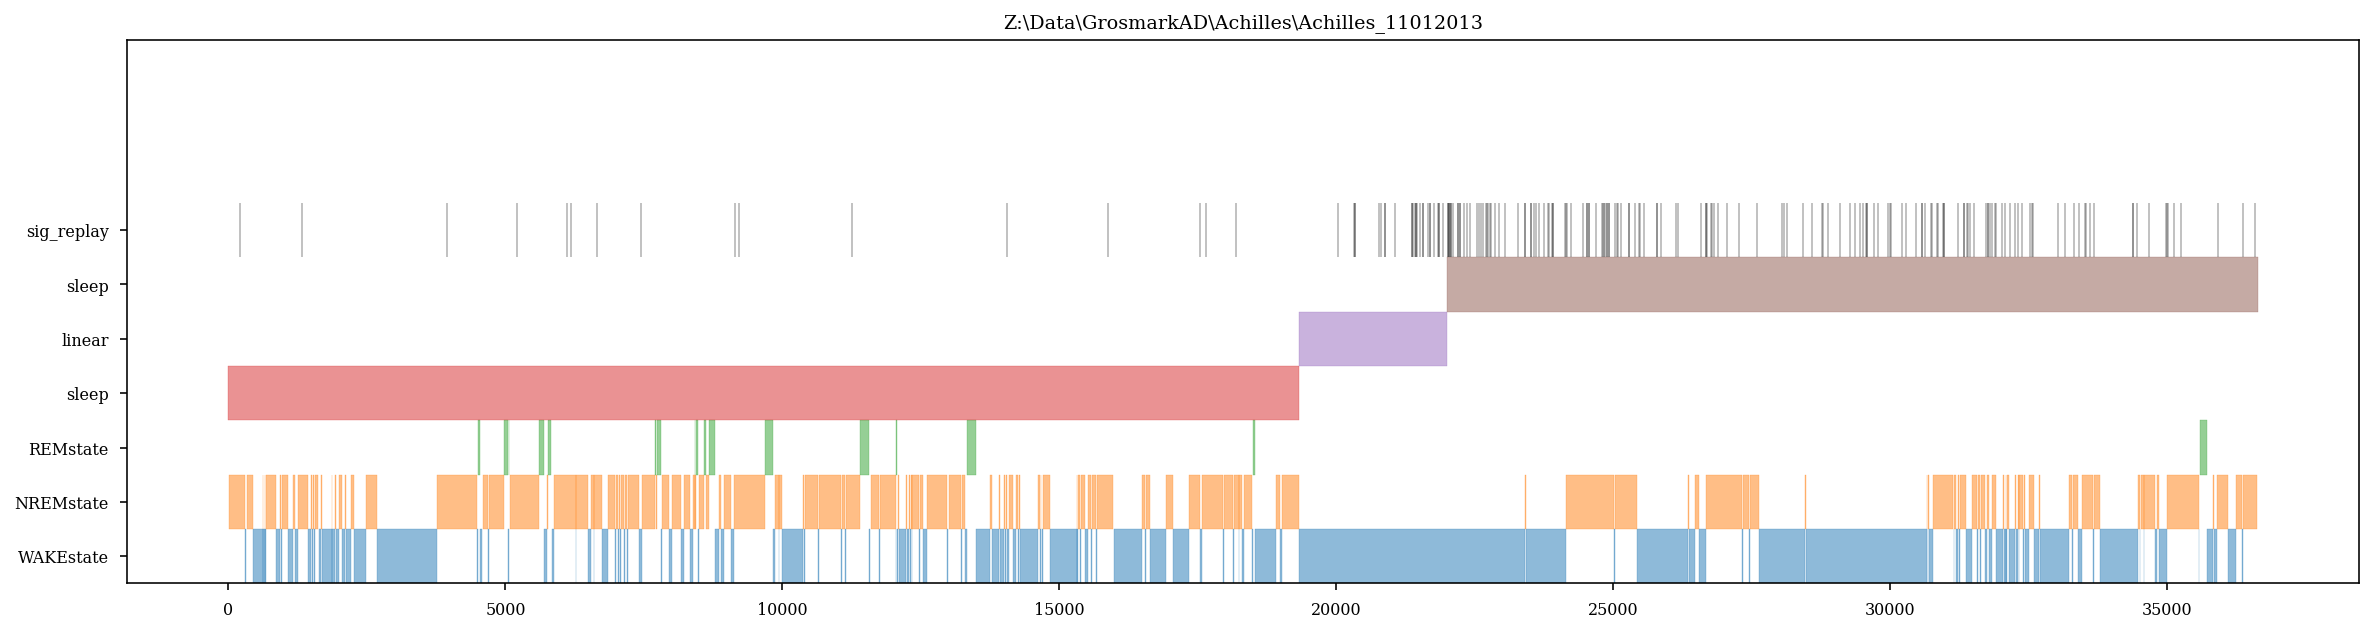

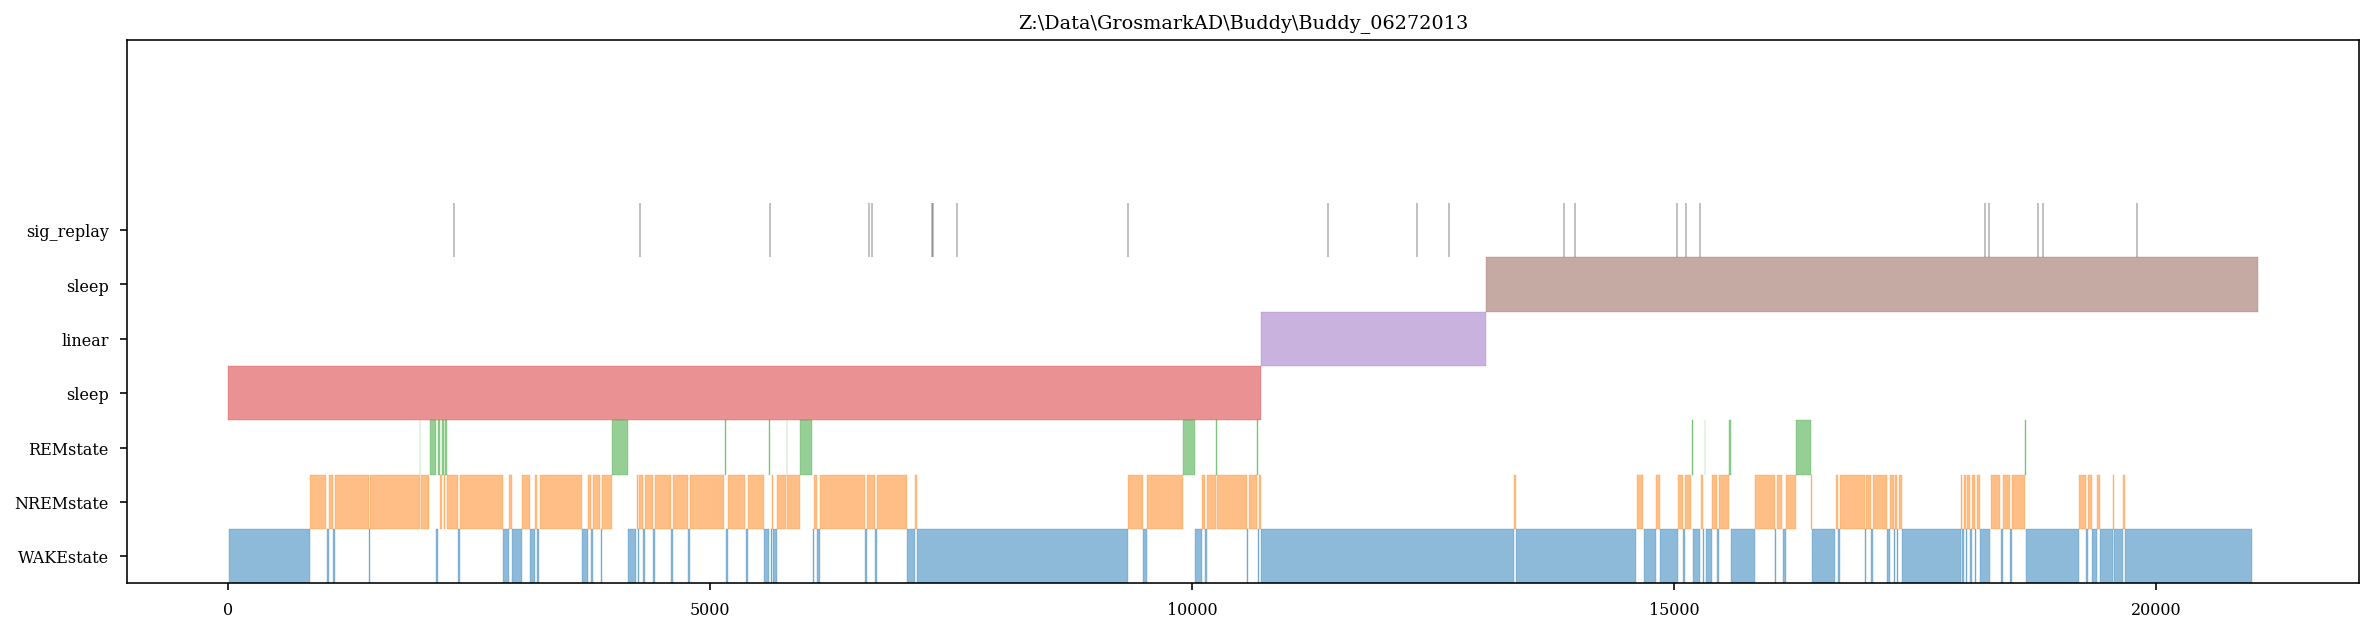

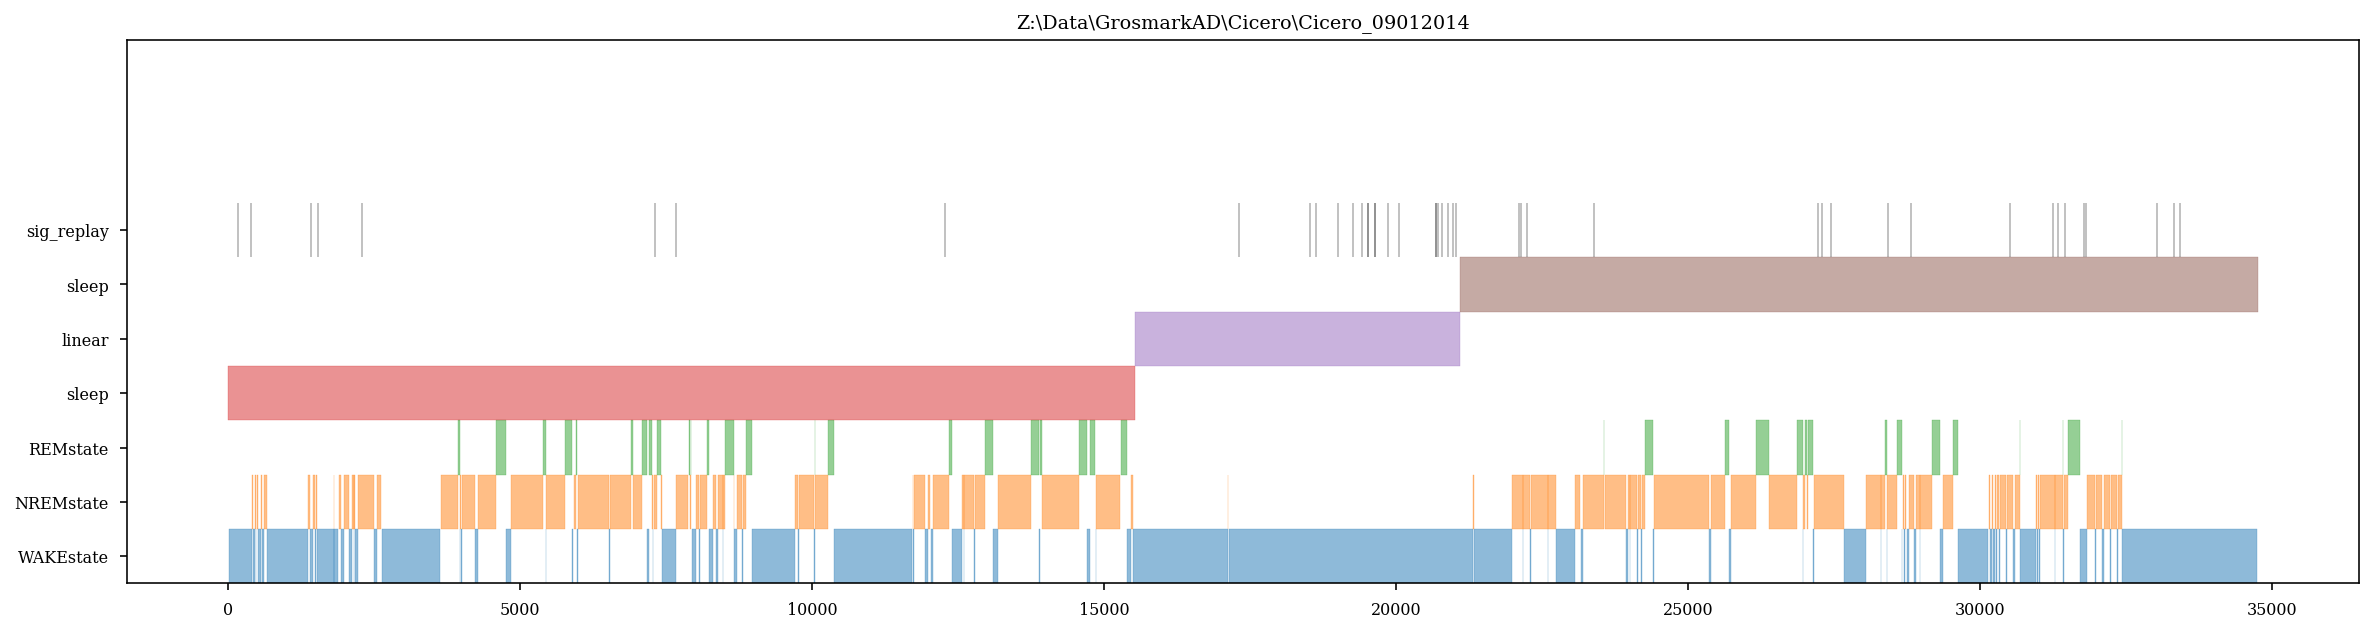

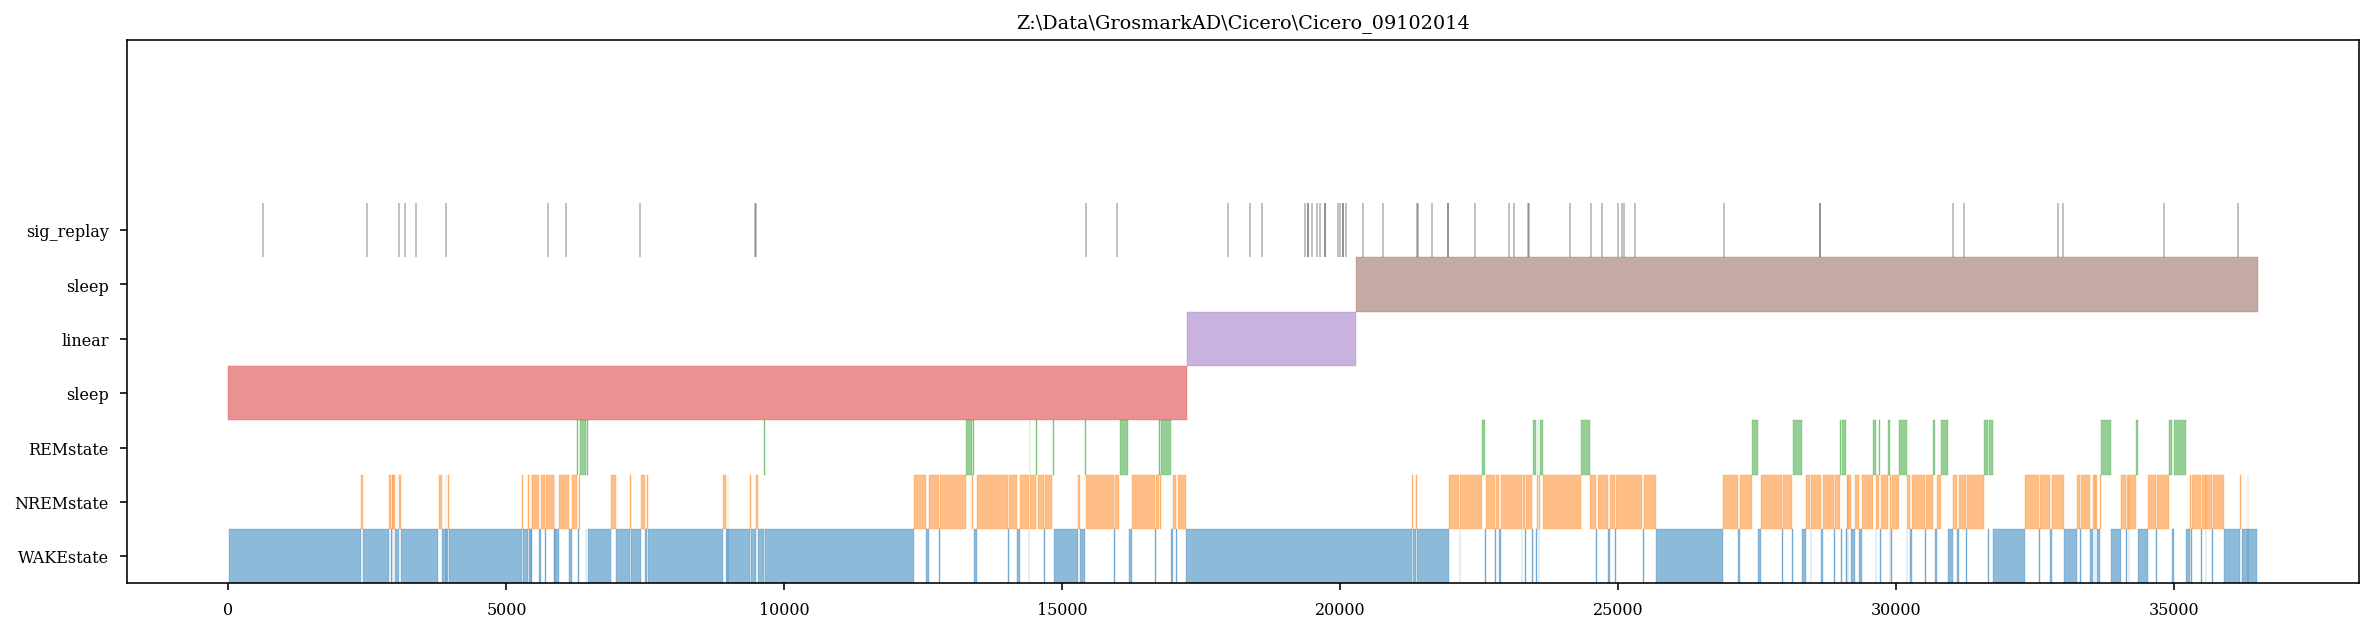

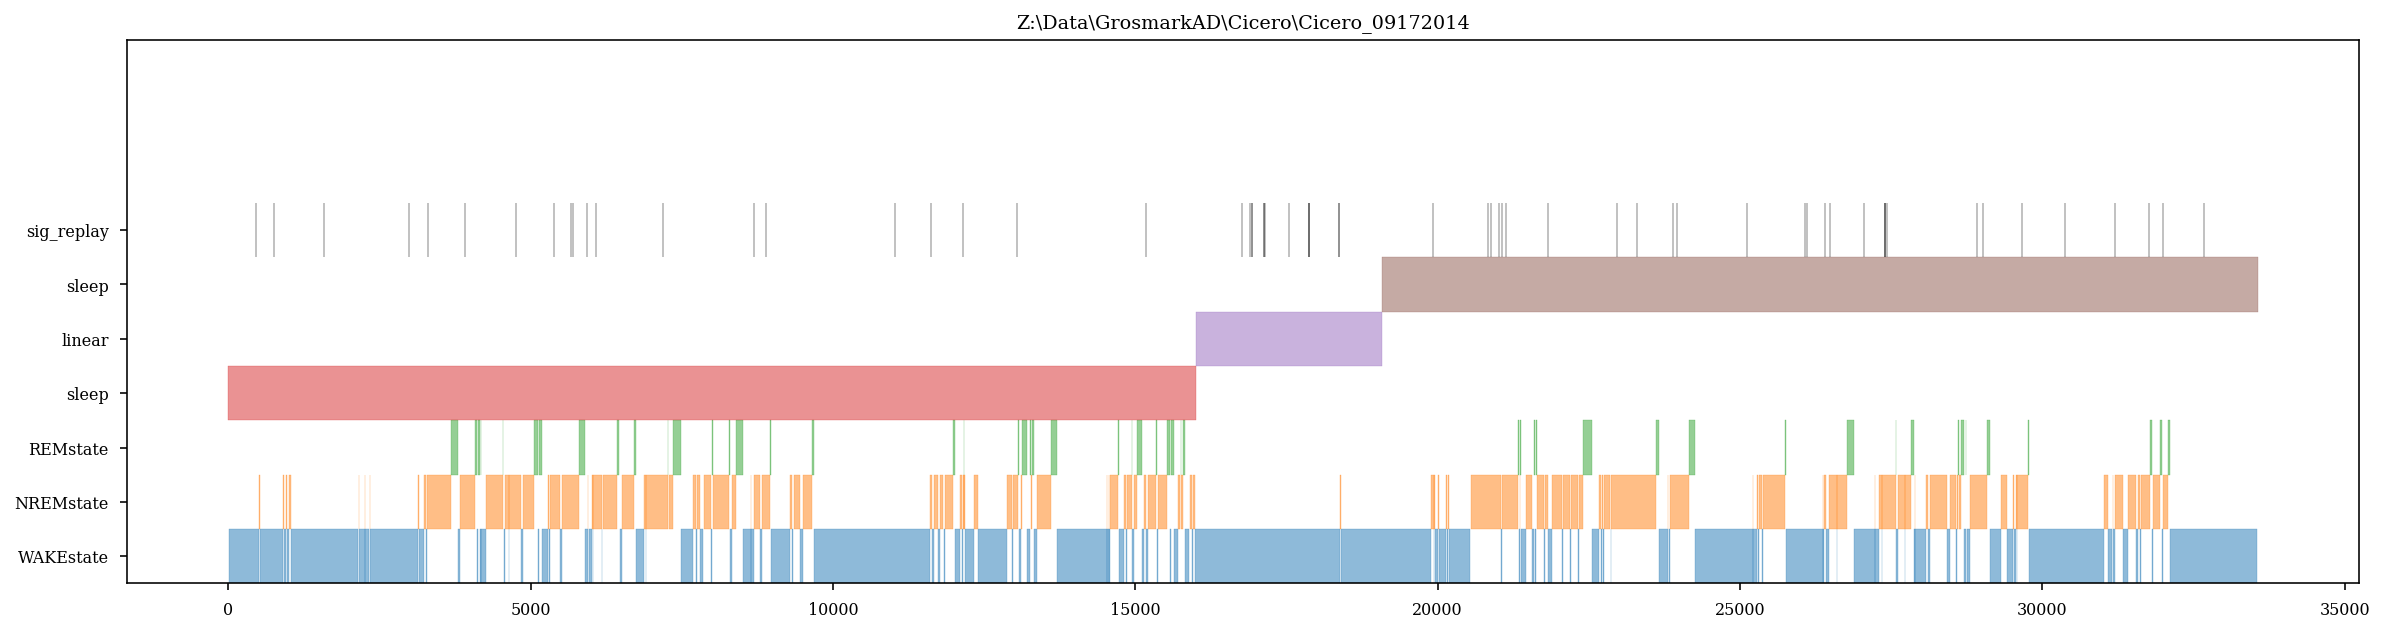

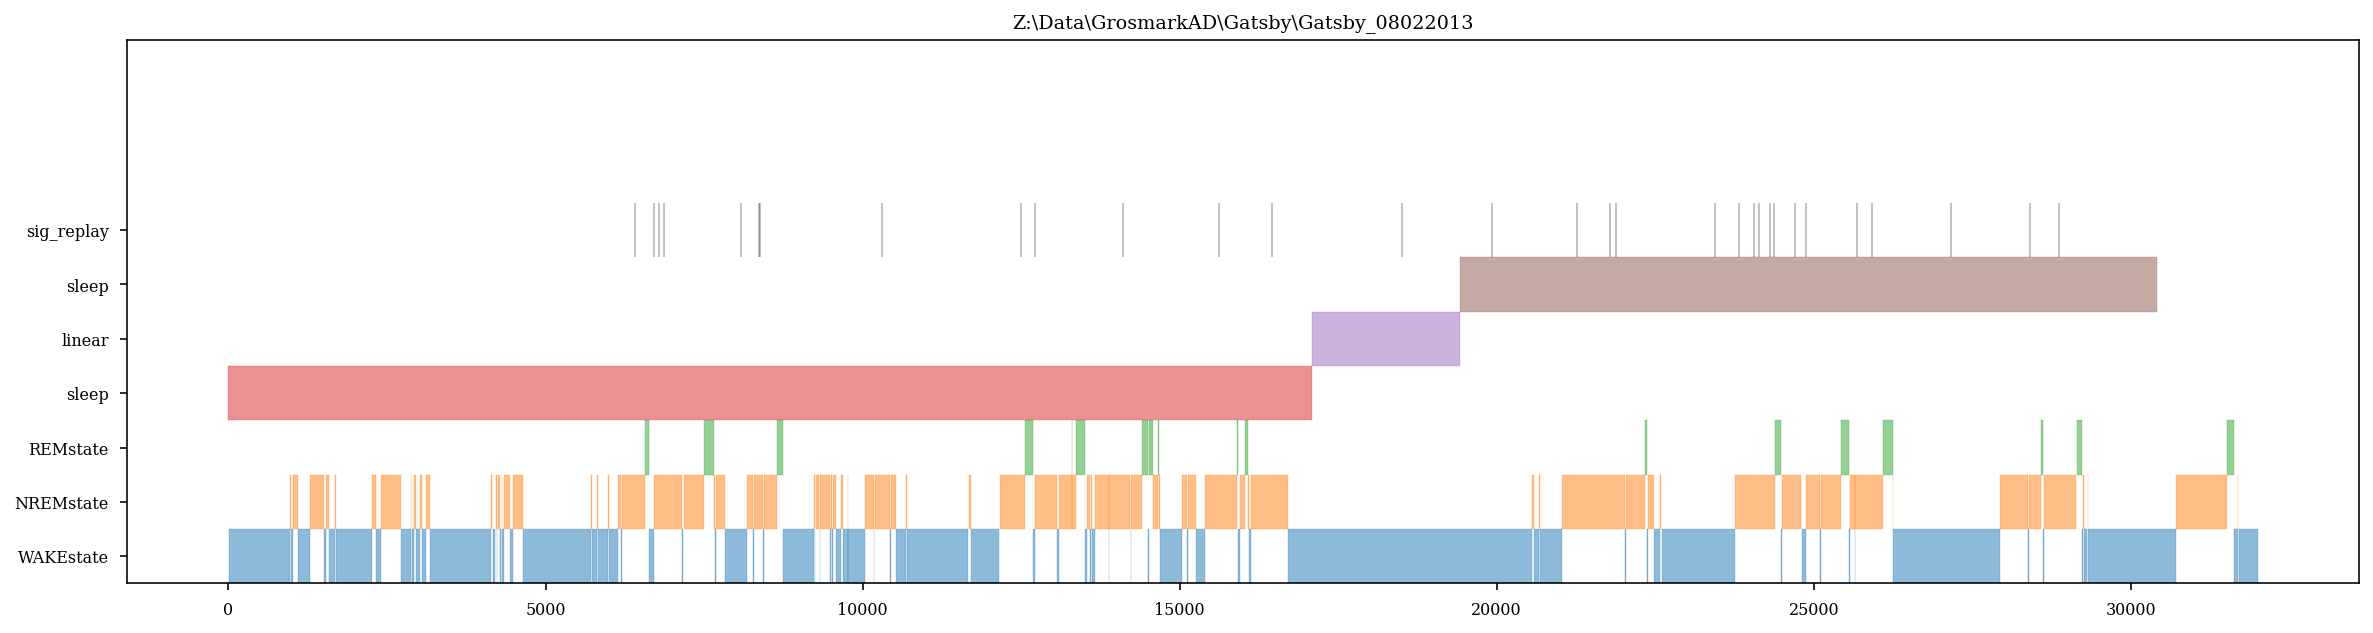

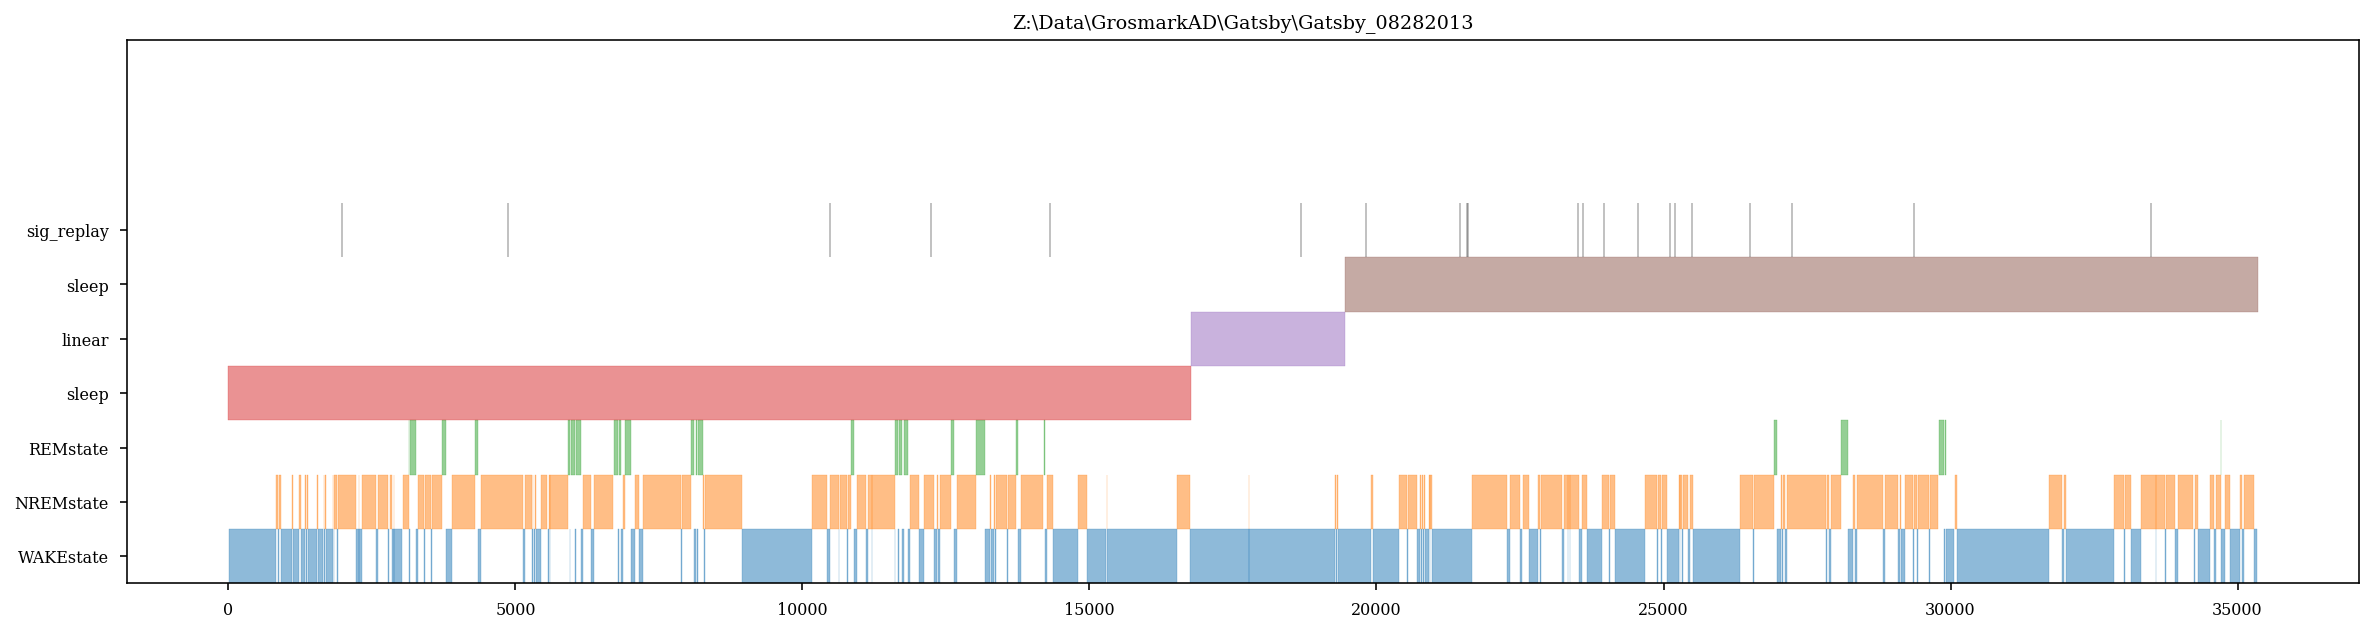

In [90]:
import matplotlib

def plot_sig_replay_over_epochs(results):

    plt.figure(figsize=(20,5))
    basepath = results['df'].basepath.unique()[0]

    states_dict = loading.load_SleepState_states(basepath)
    epoch_df = loading.load_epoch(basepath)

    cmap = matplotlib.cm.get_cmap('tab20')

    var_keys = ['WAKEstate','NREMstate','REMstate']

    y = np.arange(len(var_keys + list(epoch_df.environment))+2)*.1

    for i,key in enumerate(var_keys):
        for pair in states_dict[key]:
            plt.axvspan(pair[0], pair[1],y[i],y[i+1], alpha=0.5,color=cmap(i*.1))

    for ep in epoch_df.itertuples():
        i+=1
        plt.axvspan(ep.startTime, ep.stopTime,y[i],y[i+1], alpha=0.5,color=cmap(i*.1))


    temp_df = results['df'][(results['df']['score_pval_col_cycle'] < 0.01)]
    i+=1

    for ep in temp_df.itertuples():
        plt.axvspan(ep.start, ep.stop,y[i],y[i+1], alpha=1,color='k')

    # plt.grid() (results['df']['score_pval_time_swap'] < 0.05)
    # plt.plot(results['df'].peaks,(results['df']['score_pval_col_cycle'] < 0.01) ,'k',alpha=.5,label='sig. replay = 1')
    # plt.xlim(results['df'].peaks.min(),results['df'].peaks.max())
    # plt.legend()
    ax = plt.gca()
    ax.set_yticks(y[:-1]+.05)
    ax.set_yticklabels(var_keys + list(epoch_df.environment) + list(['sig_replay']))
    plt.title(basepath)  

sessions = glob.glob(save_path +os.sep+ '*.pkl')
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)
    plot_sig_replay_over_epochs(results)  
    

In [35]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]

In [79]:
# test = results['bst_placecells'][idx]
# # results['sta_placecells']
# test.bin_centers

any(results['df']['replay_type'] == np.nan)

False

In [4]:
sessions = glob.glob(save_path +os.sep+ '*.pkl')

with open(sessions[0], 'rb') as f:
    results = pickle.load(f)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


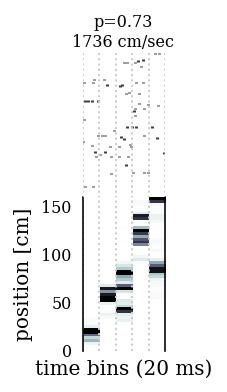

In [98]:
importlib.reload(replay_fig)

idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[2]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title) 

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


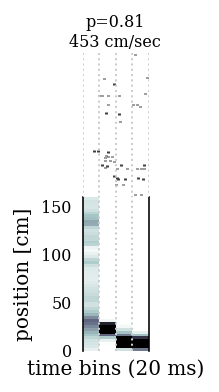

reverse


In [44]:
idxs = np.where((results['df']['replay_type'] == 'reverse') & (results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[1]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

In [50]:
# results['df'].replay_type

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


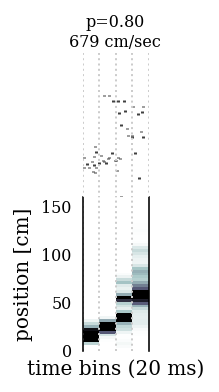

forward


In [45]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[31]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


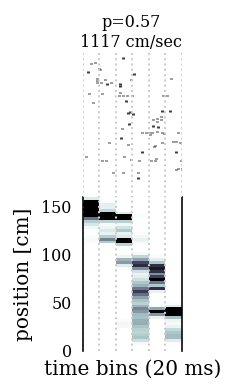

forward


In [46]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[29]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

In [50]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = (
        (results['df']['score_pval_col_cycle']<0.05) &
        (results['df']['score_pval_time_swap']<0.05)
        )
results['df'][idx]               

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,slope,intercept,score_pval_time_swap,score_pval_col_cycle,traj_dist,traj_speed,traj_step,replay_type,dist_rat_start,dist_rat_end
24,47.6952,47.8432,47.7912,851.758590,0.1480,161.080797,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.328841,276.010782,0.001999,0.009993,109.973046,916.442049,18.328841,NaN,NaN,NaN
227,862.1312,862.2456,862.1608,850.904118,0.1144,192.164774,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,34.716981,-3978.566038,0.019320,0.006662,138.867925,1735.849057,34.716981,NaN,NaN,NaN
228,862.1312,862.2456,862.1608,850.904118,0.1144,192.164774,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,34.716981,-4152.150943,0.013324,0.007328,138.867925,1735.849057,34.716981,NaN,NaN,NaN
261,960.9256,961.0640,960.9712,690.977610,0.1384,173.337576,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-10.954178,1570.875112,0.027981,0.035310,54.770889,547.708895,10.954178,NaN,NaN,NaN
539,2095.3560,2095.4424,2095.4232,378.692609,0.0864,176.284368,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-23.245283,6386.113208,0.041306,0.041972,69.735849,1162.264151,23.245283,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,33345.9768,33346.1384,33346.0552,686.269406,0.1616,161.658598,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,14.159928,-146645.283019,0.007995,0.016656,99.119497,707.996406,14.159928,NaN,NaN,NaN
10901,33636.1368,33636.2920,33636.2184,707.100262,0.1552,166.927743,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.652291,194103.935310,0.001999,0.003331,111.913747,932.614555,18.652291,NaN,NaN,NaN
10902,33636.1368,33636.2920,33636.2184,707.100262,0.1552,166.927743,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.652291,194234.501348,0.001999,0.001999,111.913747,932.614555,18.652291,NaN,NaN,NaN
11108,34270.2720,34270.4184,34270.2928,895.957985,0.1464,184.415552,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-23.180593,244448.625337,0.000666,0.005996,139.083558,1159.029650,23.180593,NaN,NaN,NaN


In [200]:
import warnings
warnings.filterwarnings("ignore")

idxs = np.where((results['df']['score_pval_col_cycle']<0.05))[0]

for idx in idxs:   
    idx = int(idx)   
    if isinstance(idx, int):
        title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
    else:
        title = ""
    ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                            results['sta_placecells'],
                                            results['tc'],
                                            results['tc'],
                                            vmax=.1,
                                            title_str=title)           
    fig.savefig(os.path.join(fig_save_path,'replay_examples',str(idx)+'_.png'),dpi=300,bbox_inches='tight')
    plt.close(fig)

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import nelpy.plotting as npl
import nelpy as nel

def plot_all_PBEs(bst, spiketrainarray, tuningcurve, tc_placecells, idx=None, title_str=None,vmax=.1):
    if idx is not None:
        bst = bst[idx]
    st = spiketrainarray
    tc = tuningcurve
    tc_placecells = tc_placecells

    no = tc_placecells.get_peak_firing_order_ids()
    st.reorder_units_by_ids(no, inplace=True)

    st_cut = st[bst.support]
    st_cut._support = bst.support # hacky fix so that we can plot events out of order
    st_cut = nel.utils.collapse_time(st_cut)

    # decode neural activity
    posterior, bdries, mode_pth, mean_pth = nel.decoding.decode1D(bst=bst, ratemap=tc, xmax=120)
    
    width,height = functions.set_size('thesis', fraction=.25, subplots=(3, 1))

#     with npl.FigureManager(show=True, figsize=(0.2*bst.n_bins,4)) as (fig, ax):
    with npl.FigureManager(show=True, figsize=(width*bst.n_bins*.1,height)) as (fig, ax):

        npl.utils.skip_if_no_output(fig)

        pixel_width = 0.5
        if vmax == False:
            npl.imagesc(x=np.arange(bst.n_bins), y=np.arange(121), data=posterior, cmap=plt.cm.bone_r, ax=ax, rasterized=True)
        else:
            npl.imagesc(x=np.arange(bst.n_bins), y=np.arange(121), data=posterior, cmap=plt.cm.bone_r, ax=ax,vmax=vmax, rasterized=True)
#         npl.utils.yticks_interval(310)
        npl.utils.no_yticks(ax)
        # plt.imshow(posterior, cmap=plt.cm.Spectral_r, interpolation='none', aspect='auto')
        ax.vlines(np.arange(bst.lengths.sum())-pixel_width, *ax.get_ylim(), lw=1, linestyle=':', color='0.8')
        ax.vlines(np.cumsum(bst.lengths)-pixel_width, *ax.get_ylim(), lw=1)

        ax.set_xlim(-pixel_width, bst.lengths.sum()-pixel_width)

        event_centers = np.insert(np.cumsum(bst.lengths),0,0)
        event_centers = event_centers[:-1] + bst.lengths/2 - 0.5

        ax.set_xticks(event_centers)
        if idx is not None:
            ax.set_xticklabels(idx)
        else:
            ax.set_xticklabels(np.arange(bst.n_epochs))

        npl.utils.no_xticks(ax)
#         npl.utils.clear_left_right(ax)
        npl.utils.clear_top_bottom(ax)
        
        divider = make_axes_locatable(ax)
        axRaster = divider.append_axes("top", size=1, pad=0)

        npl.rasterplot(st_cut, vertstack=True, ax=axRaster, lh=1.25)
        axRaster.set_xlim(st_cut.support.time.squeeze())
        bin_edges = np.linspace(st_cut.support.time[0,0],st_cut.support.time[0,1], bst.n_bins+1)
        axRaster.vlines(bin_edges, *ax.get_ylim(), lw=1, linestyle=':', color='0.8',zorder=-1000)
#         axRaster.vlines(bin_edges[np.cumsum(bst.lengths)], *ax.get_ylim(), lw=1, color='0.2')
        npl.utils.no_xticks(axRaster)
        npl.utils.no_xticklabels(axRaster)
        npl.utils.no_yticklabels(axRaster)
        npl.utils.no_yticks(axRaster)
        ax.set_ylabel('position [cm]')
        ax.set_xlabel('time bins (20 ms)')
        if title_str:
            fig.suptitle(title_str,fontsize=8)
        npl.utils.clear_left_right(axRaster)
#         npl.utils.clear_right(axRaster)
        npl.utils.clear_top_bottom(axRaster)
    return ax,fig